# Collector Performance Analysis



**Table of Contents**

>>[Introduction](#scrollTo=z17qj0p7JFgB)

>>[Data Loading](#scrollTo=XBMTvRJyJOq7)

>>[Data Cleaning](#scrollTo=iQKMtkBHsqiy)

>>[Data Preprocessing](#scrollTo=56mDq9zmiZsU)

>>[Exploratory Data Analysis](#scrollTo=LGAygSoiVEFZ)

>>[Feature Engineering](#scrollTo=Qkf0kf0bohvg)

>>[Standarisasi Z-score](#scrollTo=vejzHh6Y-iS6)

>>[Splitting Dataset](#scrollTo=RbMh0mNwp_Zf)

>>[XGBoost Feature Importance](#scrollTo=WeTwlT6q0wZY)

>>[Hyperparameter Tuning](#scrollTo=oNXiR-1rTWsL)

>>[Modeling and evaluation](#scrollTo=OhxXvQISVBSN)


## Introduction


*   **Purpose**: The Collector Performance Analysis project aims to accelerate and streamline the classification of debt collector performance—a process that previously required significant time and coordination across multiple stakeholders. By leveraging machine learning-based modeling, the project systematically uncovers performance patterns across categories. More importantly, it delivers precise, actionable insights to individual collectors by revealing the key variables that most influence performance improvement, enabling targeted enhancements with real impact.
  
*   **Dataset Overview**:<br>
`one_on_one_collector_review_dataset.csv`: This dataset contains 12,000 rows of debt collector performance record data, with 17 main columns. The focus is on assessing individual collector performance based on the number of debts handled, payments collected, quality of interactions, and case outcomes. if you want to understand more details please check this [dataset dictionary](https://docs.google.com/spreadsheets/d/1hPWlXCpdDjMGQdZgv-zFtahSXsYEJCbGflSioJz5JPc/edit?usp=sharing).<br>

**target variable** = `collector_performance_category`




## Data Loading
Load and examine the initial structure of the datasets required for this analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/one_on_one_collector_review.csv')

In [ ]:
data.head()

id_collector collector_name  month  total_debt  \
0          7061  Rahmi Gunarto      1   633037062   
1          7061  Rahmi Gunarto      2   732376849   
2          7061  Rahmi Gunarto      3   331059901   
3          7061  Rahmi Gunarto      4   868783734   
4          7061  Rahmi Gunarto      5   123469309   

   total_debt_payment_recieved communication_quality problem_solving  \
0                    558678271                  Baik     Sangat Baik   
1                    612372824           Sangat Baik            Baik   
2                    331059901                 Cukup     Sangat Baik   
3                    797302248                  Baik            Baik   
4                    123469309           Sangat Baik            Baik   

   transfer_day_diff debtor_feedback  total_contact  contact_connected  \
0                 25            Baik             61                 31   
1                 10            Baik             32                 22   
2                 20            Baik             82                 35   
3                 25     Sangat Baik             43                 31   
4                 20            Baik             68                 36   

   call_to_ptp  total_case  total_case_closed  success_ratio  \
0           22          20                 17           0.85   
1           16          20                 12           0.60   
2           26          20                 20           1.00   
3           23          20                 18           0.90   
4           27          20                 20           1.00   

  success_ratio_cat collector_performance_category  
0              High                         Medium  
1            Medium                           High  
2              High                           High  
3              High                           High  
4              High                           High

In [ ]:
data.shape

(12000, 17)

In [ ]:
data = data.drop('collector_name', axis=1)

The `collector_name` column is discarded as it is not necessary.

`df.head()` is performed to test whether the changes made have been successfully applied to df

In [ ]:
data.head()

id_collector  month  total_debt  total_debt_payment_recieved  \
0          7061      1   633037062                    558678271   
1          7061      2   732376849                    612372824   
2          7061      3   331059901                    331059901   
3          7061      4   868783734                    797302248   
4          7061      5   123469309                    123469309   

  communication_quality problem_solving  transfer_day_diff debtor_feedback  \
0                  Baik     Sangat Baik                 25            Baik   
1           Sangat Baik            Baik                 10            Baik   
2                 Cukup     Sangat Baik                 20            Baik   
3                  Baik            Baik                 25     Sangat Baik   
4           Sangat Baik            Baik                 20            Baik   

   total_contact  contact_connected  call_to_ptp  total_case  \
0             61                 31           22          20   
1             32                 22           16          20   
2             82                 35           26          20   
3             43                 31           23          20   
4             68                 36           27          20   

   total_case_closed  success_ratio success_ratio_cat  \
0                 17           0.85              High   
1                 12           0.60            Medium   
2                 20           1.00              High   
3                 18           0.90              High   
4                 20           1.00              High   

  collector_performance_category  
0                         Medium  
1                           High  
2                           High  
3                           High  
4                           High

## Data Cleaning
Step yang penting untuk dilakukan untuk memastikan validitas dan integritas data sebelum melakukan analisa yang lebih mendalam. dalam step ini dilakukan hal sebagai berikut:
*   Data type correction
*   Check missing value and false input
*   Check for duplicate id_collector
*   Check for duplicate category data
*   Check for duplicate row
*   Percentage of "dirty" data
*   Find and Handling outlier





### Basic data information


Backup raw data

In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['id_collector', 'month', 'total_debt', 'total_debt_payment_recieved',
       'communication_quality', 'problem_solving', 'transfer_day_diff',
       'debtor_feedback', 'total_contact', 'contact_connected', 'call_to_ptp',
       'total_case', 'total_case_closed', 'success_ratio', 'success_ratio_cat',
       'collector_performance_category'],
      dtype='object')

### Data type correction
Ensure accurate data types, particularly for date columns.

In [ ]:
df.dtypes

id_collector                        int64
month                               int64
total_debt                          int64
total_debt_payment_recieved         int64
communication_quality              object
problem_solving                    object
transfer_day_diff                   int64
debtor_feedback                    object
total_contact                       int64
contact_connected                   int64
call_to_ptp                         int64
total_case                          int64
total_case_closed                   int64
success_ratio                     float64
success_ratio_cat                  object
collector_performance_category     object
dtype: object

In [ ]:
df['month'] = pd.to_datetime(df['month'].astype(str) + '-01-2024', format='%m-%d-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id_collector                    12000 non-null  int64         
 1   month                           12000 non-null  datetime64[ns]
 2   total_debt                      12000 non-null  int64         
 3   total_debt_payment_recieved     12000 non-null  int64         
 4   communication_quality           12000 non-null  object        
 5   problem_solving                 12000 non-null  object        
 6   transfer_day_diff               12000 non-null  int64         
 7   debtor_feedback                 12000 non-null  object        
 8   total_contact                   12000 non-null  int64         
 9   contact_connected               12000 non-null  int64         
 10  call_to_ptp                     12000 non-null  int64         
 11  to

### Chek Missing Value and false input

In this section, empty values, false inputs, duplicate values and writing errors in category variables are identified.

The values identified as false inputs are
  - when total debt payment received > total debt
  - transfer day diff = 31
  - total cases closed > total cases

In [ ]:
count = (df['total_debt_payment_recieved'] > df['total_debt']).sum()
print(count)

0


In [ ]:
count_transfer_day_diff = (df['transfer_day_diff'] > 31).sum()
print(count_transfer_day_diff)

0


In [ ]:
count_case_closed = (df['total_case_closed'] > df['total_case']).sum()
print(count_case_closed)

0


### Check for duplicate id_collector
Because this study has a date range of 1 year and each row in this dataset is considered monthly, id_collector whose number is > 12 or < 12 will be considered problematic.

In [ ]:
collector_counts = df['id_collector'].value_counts()
collectors_more_than_12_months = collector_counts[collector_counts > 12]
print("Number of id_collector with more than 12 months of data:", len(collectors_more_than_12_months))

Number of id_collector with more than 12 months of data: 43


There are 43 id_collectors that have more than 12 lines. let's explore it

In [ ]:
collector_counts = df['id_collector'].value_counts()
collectors_less_than_12_months = collector_counts[collector_counts < 12]
print("Number of id_collector with less than 12 months of data:", len(collectors_less_than_12_months))

Number of id_collector with less than 12 months of data: 0


In [ ]:
collector_counts = df['id_collector'].value_counts()
collector_counts

id_collector
6188    36
7420    36
2160    24
8221    24
7028    24
        ..
8859    12
4402    12
9281    12
3138    12
7061    12
Name: count, Length: 955, dtype: int64

In [ ]:
collectors_more_than_12_months.head()

id_collector
6188    36
7420    36
2160    24
8221    24
7028    24
Name: count, dtype: int64

In [ ]:
collectors_more_than_12_months.shape

(43,)

Observing sample id_collector that exceeds date range

In [ ]:
display(df[df['id_collector'] == 5171])

id_collector      month  total_debt  total_debt_payment_recieved  \
2496          5171 2024-01-01   374530466                    306249125   
2497          5171 2024-02-01   676789891                    187067076   
2498          5171 2024-03-01   543477507                    520278284   
2499          5171 2024-04-01   163272733                    140416531   
2500          5171 2024-05-01   800913374                    796150599   
2501          5171 2024-06-01   874265417                    713800534   
2502          5171 2024-07-01   978660631                    887088749   
2503          5171 2024-08-01   838974042                    736254348   
2504          5171 2024-09-01   466316930                    466316930   
2505          5171 2024-10-01   110820072                    107102835   
2506          5171 2024-11-01   791781150                    634833316   
2507          5171 2024-12-01   343310154                    343310154   
9576          5171 2024-01-01   649311510                    577356505   
9577          5171 2024-02-01   783595933                    748389977   
9578          5171 2024-03-01   181243375                    178323973   
9579          5171 2024-04-01   489858097                    489858097   
9580          5171 2024-05-01   659805574                    315437840   
9581          5171 2024-06-01   443386766                    392464091   
9582          5171 2024-07-01   886746373                    878862633   
9583          5171 2024-08-01   917476551                    917476551   
9584          5171 2024-09-01   613379704                    497983420   
9585          5171 2024-10-01   934326694                    934326694   
9586          5171 2024-11-01   979989344                    939627023   
9587          5171 2024-12-01   416457032                    416457032   

     communication_quality   problem_solving  transfer_day_diff  \
2496                  Baik              Baik                 22   
2497                 Cukup             Buruk                 29   
2498                  Baik              Baik                 22   
2499                 Cukup              Baik                 15   
2500           Sangat Baik             Cukup                 30   
2501                  Baik              Baik                 27   
2502           Sangat Baik       Sangat Baik                 19   
2503           Sangat Baik       Sangat Baik                 15   
2504           Sangat Baik       Sangat Baik                 21   
2505                 Cukup              Baik                 11   
2506                 Cukup              Baik                 13   
2507                  Baik              Baik                 13   
9576                  Baik              Baik                 16   
9577      Kurang Memuaskan              Baik                  6   
9578                  Baik              Baik                  4   
9579                  Baik              Baik                 15   
9580      Kurang Memuaskan  Kurang Memuaskan                 30   
9581                 Cukup       Sangat Baik                  9   
9582                  Baik              Baik                 13   
9583                  Baik              Baik                 16   
9584                 Buruk             Cukup                 30   
9585           Sangat Baik       Sangat Baik                  9   
9586           Sangat Baik              Baik                 12   
9587                 Cukup       Sangat Baik                 12   

       debtor_feedback  total_contact  contact_connected  call_to_ptp  \
2496       Sangat Baik             87                 29           21   
2497             Cukup             35                  5            3   
2498              Baik             27                 27           20   
2499              Baik             34                 32           24   
2500       Sangat Baik             37                 13            9   
2501       Sangat Baik             72    

In [ ]:
df_filtered = df.groupby('id_collector').tail(12).reset_index(drop=True)
df_filtered.shape

(11460, 16)

Number of RAW data : 12.000<br>
Number of filtered data 1 : 11460

In [ ]:
df = df_filtered

In [ ]:
collector_counts = df['id_collector'].value_counts()
collectors_more_than_12_months = collector_counts[collector_counts < 12]
print("Number of id_collector with more than 12 months of data:", len(collectors_more_than_12_months))

Number of id_collector with more than 12 months of data: 0


After a discussion with the stakeholder, he said that it was a common error in the system, **so the usual solution was to retain the last 12 rows of the dataset.**

The final result shows that the id_collector whose number > 12 has disappeared

### Check duplicate for category data
Use `.unique()` to see the unique value for each data category. We can see there when there are duplicates, inconsistent writing and other common problems in data categories.

In [ ]:
print("Kategori pada communication_quality:")
print(df['communication_quality'].unique())

print("\nKategori pada problem_solving:")
print(df['problem_solving'].unique())

print("\nKategori pada debtor feedback:")
print(df['debtor_feedback'].unique())

print("\nKategori pada success_ratio_cat:")
print(df['success_ratio_cat'].unique())

print("\nKategori pada collector_performance_category:")
print(df['collector_performance_category'].unique())

Kategori pada communication_quality:
['Baik' 'Sangat Baik' 'Cukup' 'Buruk' 'Kurang Memuaskan']

Kategori pada problem_solving:
['Sangat Baik' 'Baik' 'Cukup' 'Kurang Memuaskan' 'Buruk']

Kategori pada debtor feedback:
['Baik' 'Sangat Baik' 'Buruk' 'Kurang Memuaskan' 'Cukup']

Kategori pada success_ratio_cat:
['High' 'Medium' 'Low']

Kategori pada collector_performance_category:
['Medium' 'High' 'Low']


### Check for duplicate row

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Jumlah data duplikat: ", duplicate_rows_df.shape[0])

print("Data duplikat:")
print(duplicate_rows_df)

Jumlah data duplikat:  0
Data duplikat:
Empty DataFrame
Columns: [id_collector, month, total_debt, total_debt_payment_recieved, communication_quality, problem_solving, transfer_day_diff, debtor_feedback, total_contact, contact_connected, call_to_ptp, total_case, total_case_closed, success_ratio, success_ratio_cat, collector_performance_category]
Index: []


### Find and Handling Outlier with IQR

In this stage we handle Outliers with IQR.
We performed **contextual outlier** detection on the variables call_to_ptp, total_contact, contact_connected in the context of the variable collecter_performance_category.

Everything is handled with IQR according to previous research.

Spotting Outlier for numerical data

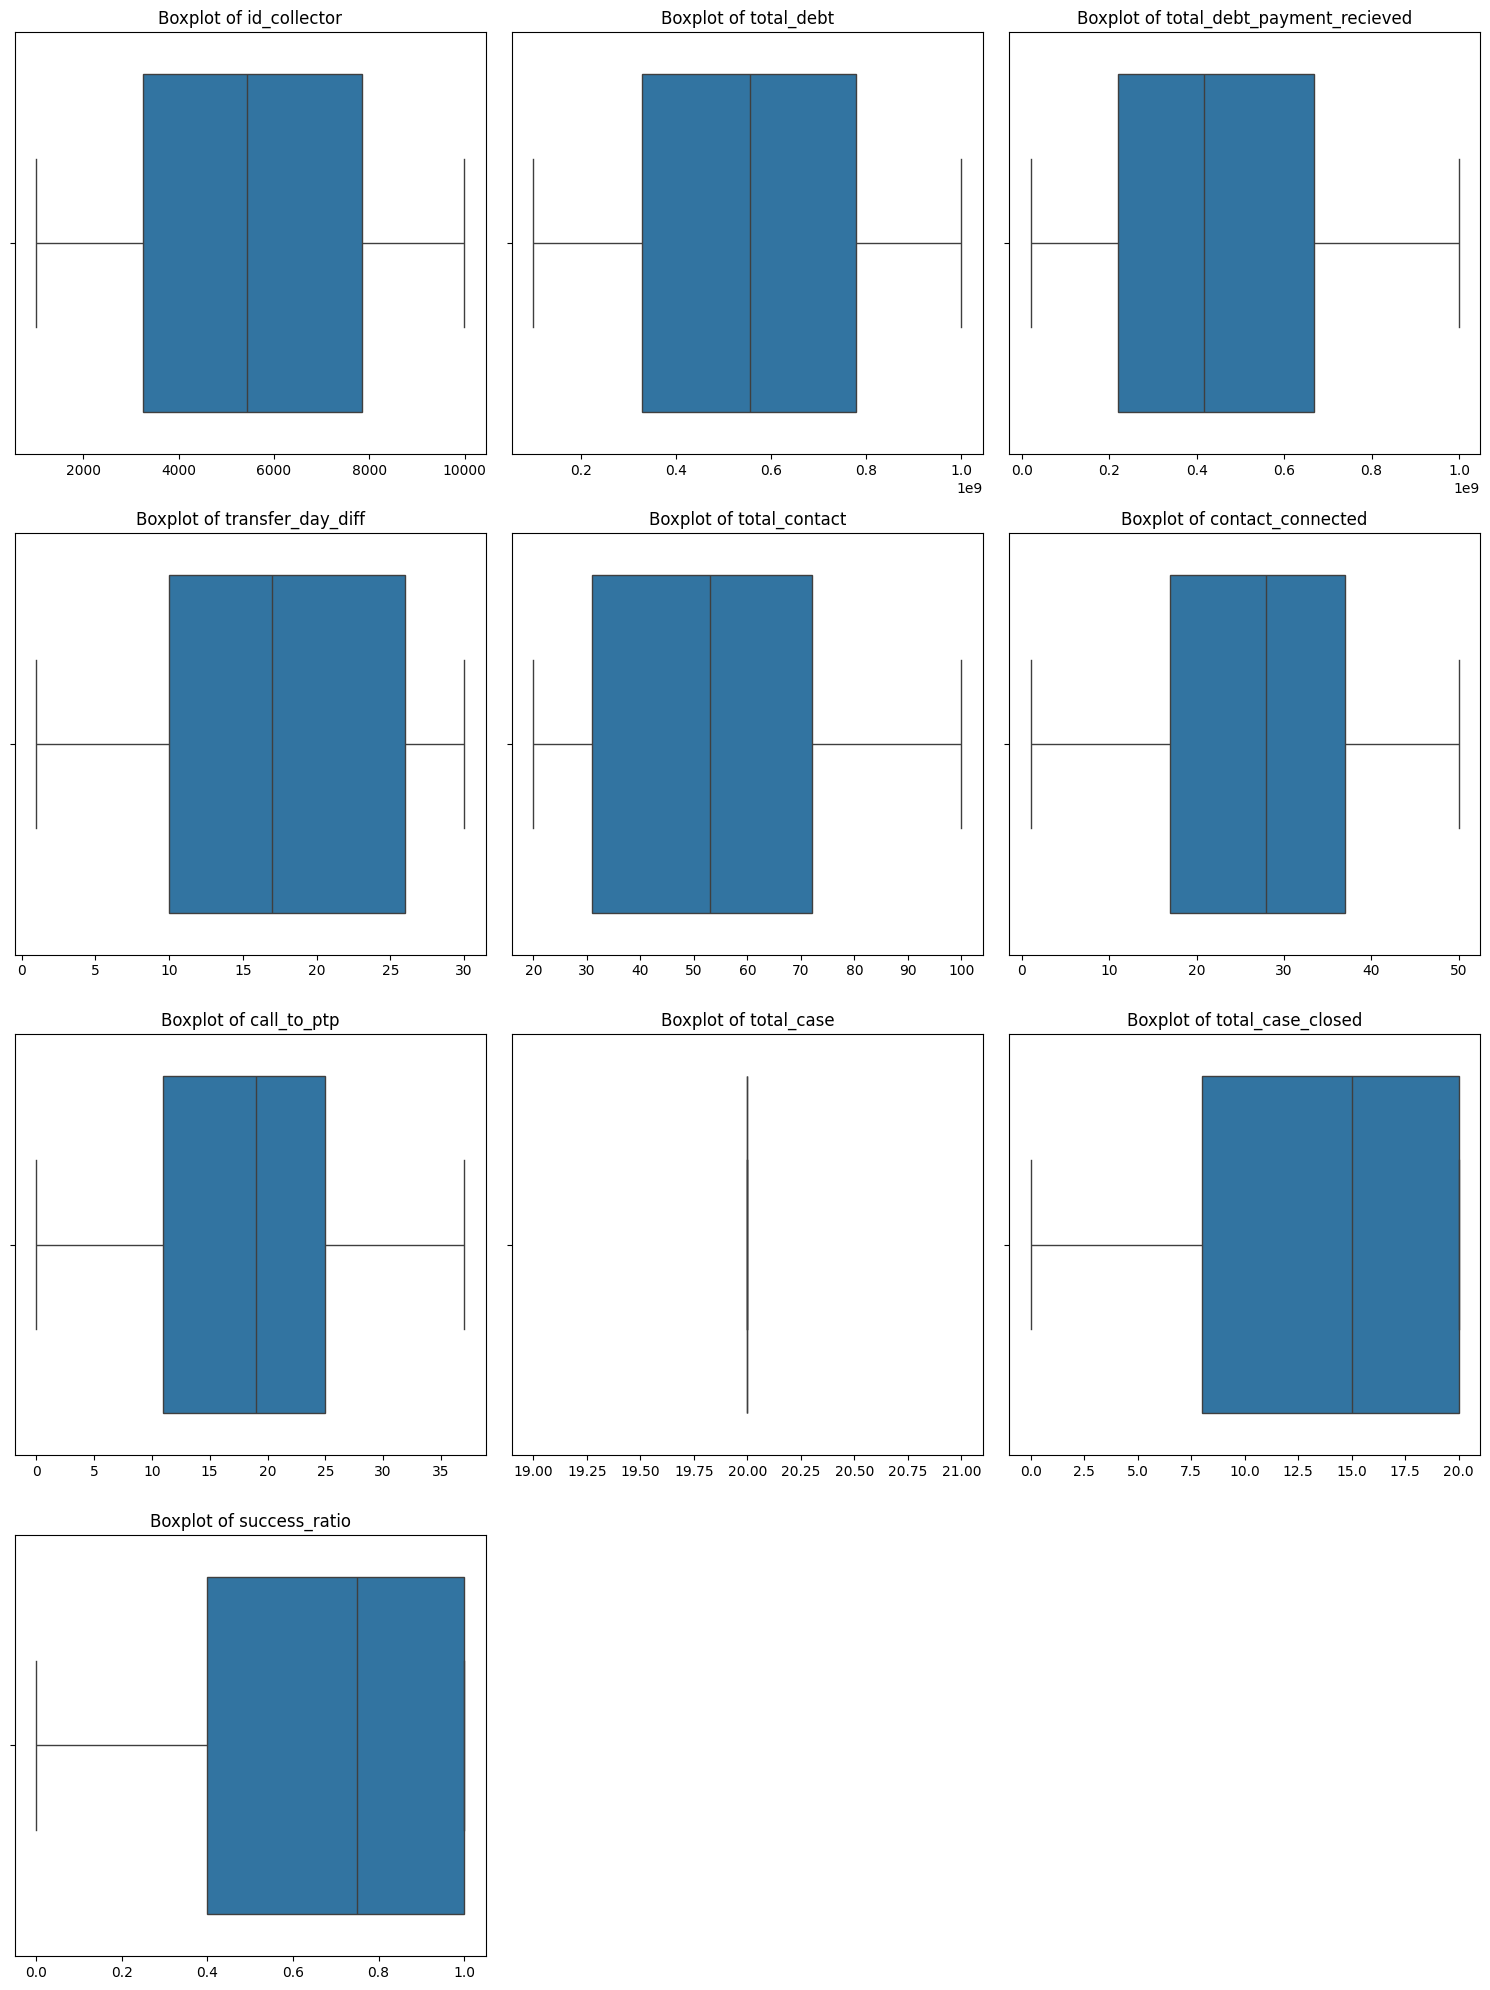

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical frequency distribution

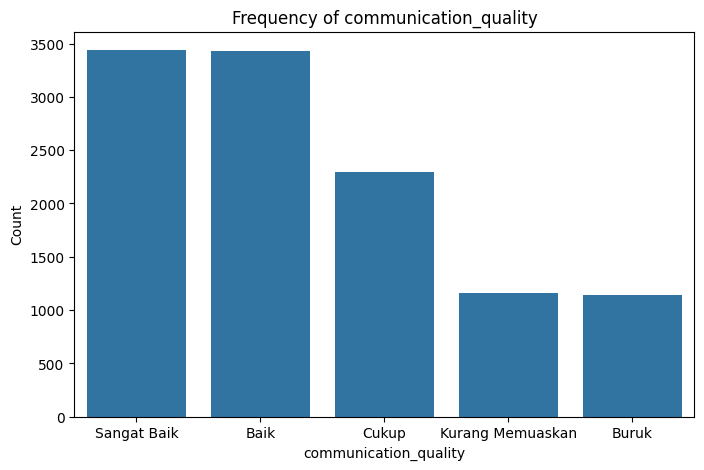

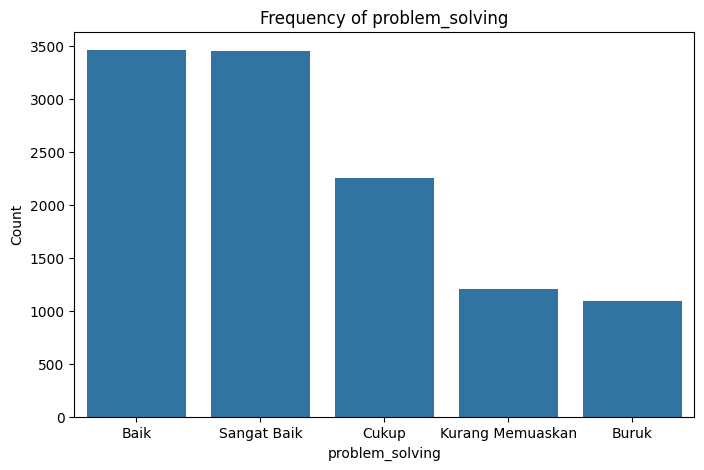

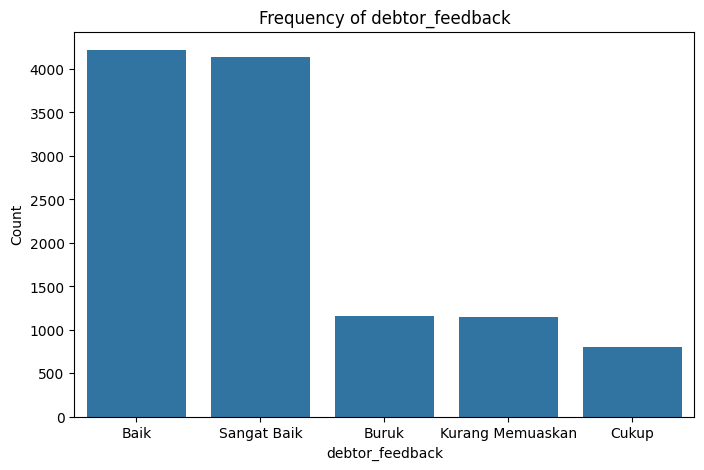

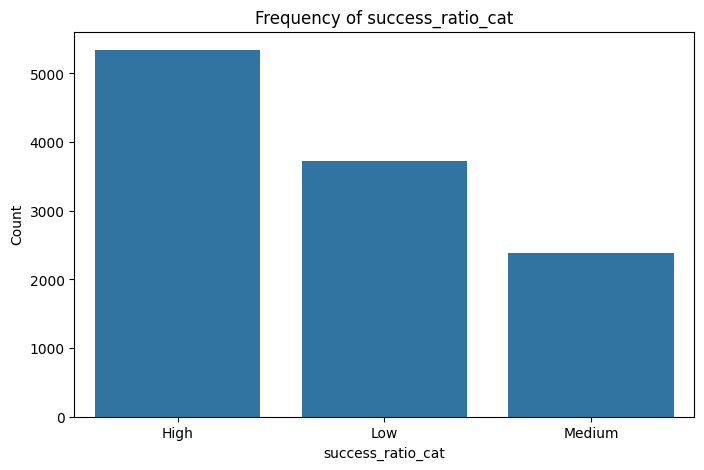

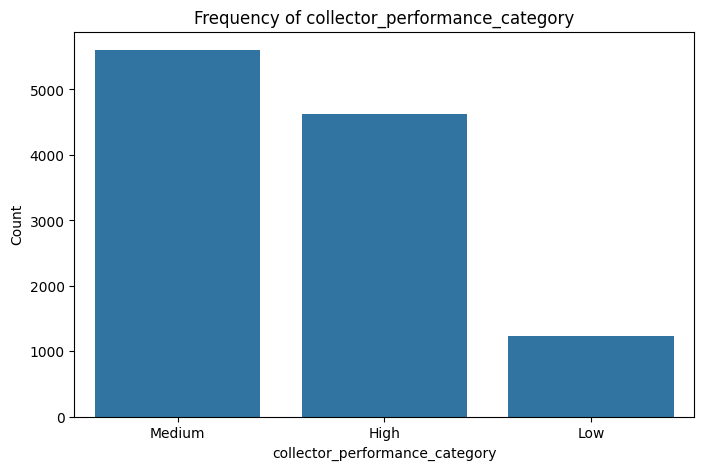

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### Contextual Outlier
observe the data distribution to spot outliers but by associating the variable values with each category label. because the purpose of this project is to spotting differences, so we can observe whether there are unusual values for each category and we will handle them with the aim of revealing the pattern of differences for each category.

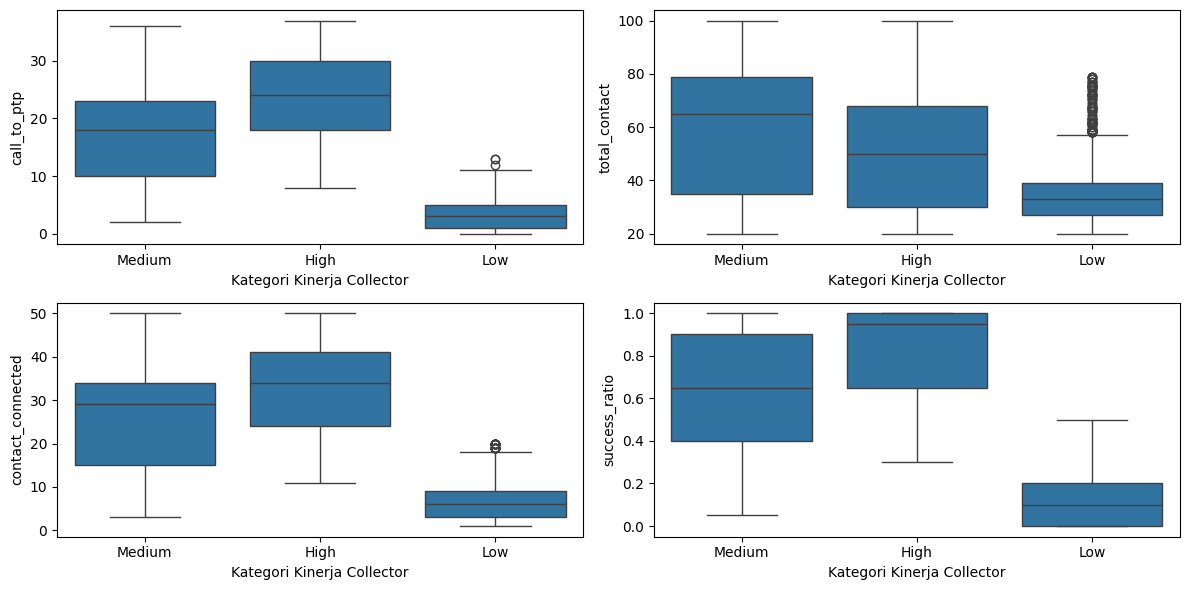

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot 1
sns.boxplot(
    x='collector_performance_category',
    y='call_to_ptp',
    data=df,
    ax=axes[0, 0]
)
axes[0, 0].set_xlabel("Kategori Kinerja Collector")
axes[0, 0].set_ylabel("call_to_ptp")

# Plot 2
sns.boxplot(
    x='collector_performance_category',
    y='total_contact',
    data=df,
    ax=axes[0, 1]
)
axes[0, 1].set_xlabel("Kategori Kinerja Collector")
axes[0, 1].set_ylabel("total_contact")

# Plot 3
sns.boxplot(
    x='collector_performance_category',
    y='contact_connected',
    data=df,
    ax=axes[1, 0]
)
axes[1, 0].set_xlabel("Kategori Kinerja Collector")
axes[1, 0].set_ylabel("contact_connected")

# Plot 4
sns.boxplot(
    x='collector_performance_category',
    y='success_ratio',
    data=df,
    ax=axes[1, 1]
)
axes[1, 1].set_xlabel("Kategori Kinerja Collector")
axes[1, 1].set_ylabel("success_ratio")

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, column, category_column):

    df_cleaned = pd.DataFrame()

    for category in df[category_column].unique():

        df_category = df[df[category_column] == category]

        Q1 = df_category[column].quantile(0.25)
        Q3 = df_category[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_category_cleaned = df_category[(df_category[column] >= lower_bound) & (df_category[column] <= upper_bound)]

        df_cleaned = pd.concat([df_cleaned, df_category_cleaned])

    return df_cleaned

df_cleaned = remove_outliers_iqr(df, 'call_to_ptp', 'collector_performance_category')

Increase the multiplier because the range of outliers in the contacts is extreme.

In [ ]:
def remove_outliers_iqr(df, column, category_column, multiplier=1.5):
    df_cleaned = pd.DataFrame()

    for category in df[category_column].unique():
        df_category = df[df[category_column] == category]

        Q1 = df_category[column].quantile(0.25)
        Q3 = df_category[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df_category_cleaned = df_category[(df_category[column] >= lower_bound) & (df_category[column] <= upper_bound)]

        df_cleaned = pd.concat([df_cleaned, df_category_cleaned])

    return df_cleaned

# Gunakan fungsi ini dengan multiplier
df_cleaned = remove_outliers_iqr(df, 'total_contact', 'collector_performance_category',  multiplier=0.5)

In [ ]:
df_cleaned = remove_outliers_iqr(df_cleaned, 'contact_connected', 'collector_performance_category')

In [ ]:
df_cleaned = remove_outliers_iqr(df_cleaned, 'success_ratio', 'collector_performance_category')

Visualisation of contextual outlier boxplots after IQR handling. It can be seen that there are no more black circles in each visualisation.

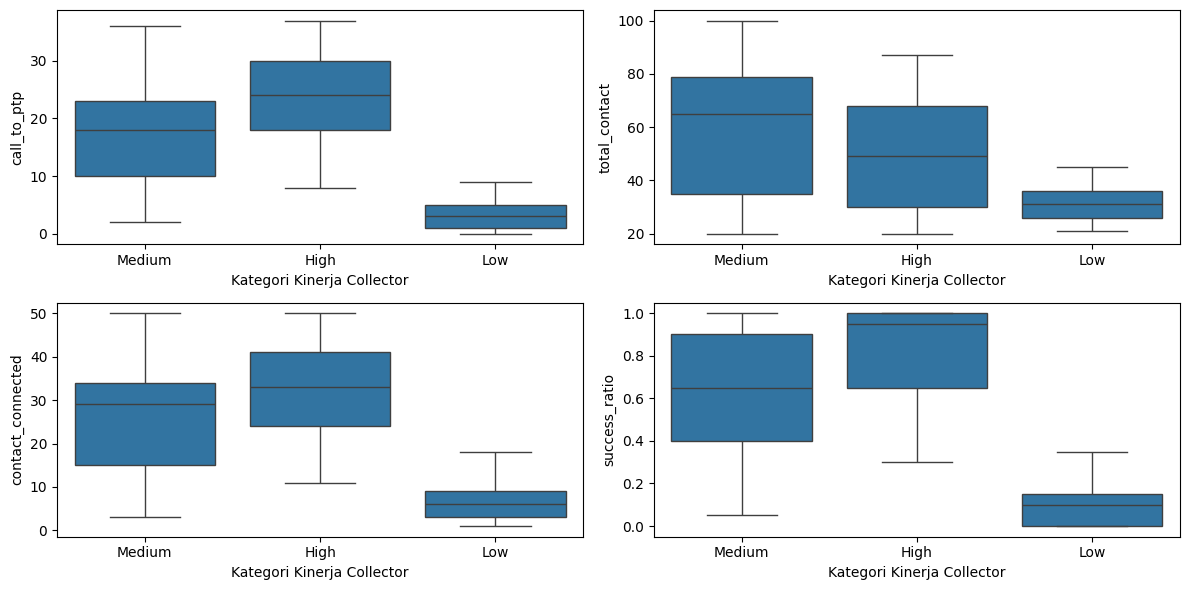

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot 1
sns.boxplot(
    x='collector_performance_category',
    y='call_to_ptp',
    data=df_cleaned,
    ax=axes[0, 0]
)
axes[0, 0].set_xlabel("Kategori Kinerja Collector")
axes[0, 0].set_ylabel("call_to_ptp")

# Plot 2
sns.boxplot(
    x='collector_performance_category',
    y='total_contact',
    data=df_cleaned,
    ax=axes[0, 1]
)
axes[0, 1].set_xlabel("Kategori Kinerja Collector")
axes[0, 1].set_ylabel("total_contact")

# Plot 3
sns.boxplot(
    x='collector_performance_category',
    y='contact_connected',
    data=df_cleaned,
    ax=axes[1, 0]
)
axes[1, 0].set_xlabel("Kategori Kinerja Collector")
axes[1, 0].set_ylabel("contact_connected")

# Plot 4
sns.boxplot(
    x='collector_performance_category',
    y='success_ratio',
    data=df_cleaned,
    ax=axes[1, 1]
)
axes[1, 1].set_xlabel("Kategori Kinerja Collector")
axes[1, 1].set_ylabel("success_ratio")

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.shape

(11124, 16)

Number of RAW data : 12.000<br>
Number of cleaned data 1 (duplicate id collector): 11460<br>
Number of cleaned data 2 (contextual outlier): 11124

In [ ]:
category_counts = df_cleaned['collector_performance_category'].value_counts()
category_counts

collector_performance_category
Medium    5605
High      4564
Low        955
Name: count, dtype: int64

### Percentage of discarded data after cleaning
Number of RAW data : 12.000<br>

Number of cleaned data 1 (duplicate id collector): 11460<br>
Percentage severity of missing values: 12.000 − 11.460 = 540 row (4,5%)<br>


Number of cleaned data 2 (contextual outlier): 11124<br>
Percentage severity of missing values: 11.460 − 11.124 = 336 row (2,9%)

## Data Preprocessing

In this step
* Removal of unnecessary variables
* Encoding categorical variables using mapping



### Eliminate unnecessary variables

In this stage, the variables id_collector and collector name are removed because they are not relevant to modelling.

In [ ]:
df_cleaned = df_cleaned.drop(['id_collector'], axis=1)

### Convert category variable to numeric using mapping

At this stage, data transformation from category variables to numeric occurs. I use the concept of label encoding because the category variables I have are ordinal type categories (nested).

But I didn't use label encoding directly. because when I tried it, label encoding had an error in sorting the nested variables. it caused the feature correlation value to be damaged.

So I used mapping. so that the changes in numerical values are clearly mapped according to what I want.



In [ ]:
mapping = {'Buruk': 1, 'Cukup': 2, 'Kurang Memuaskan': 3, 'Baik': 4, 'Sangat Baik': 5}

df_cleaned['communication_quality'] = df_cleaned['communication_quality'].map(mapping)
df_cleaned['problem_solving'] = df_cleaned['problem_solving'].map(mapping)
df_cleaned['debtor_feedback'] = df_cleaned['debtor_feedback'].map(mapping)

df_cleaned.head()

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4             61   
6                 5                 18                4             63   
8                 4                 10                5             74   
9                 4                 12                5             93   
10                5                  9                5             64   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0                  31           22          20                 17   
6                  48           21          20                 16   
8                  23           15          20                 12   
9                  40           19          20                 15   
10                 41           22          20                 17   

    success_ratio success_ratio_cat collector_performance_category  
0            0.85              High                         Medium  
6            0.80              High                         Medium  
8            0.60            Medium                         Medium  
9            0.75            Medium                         Medium  
10           0.85              High                         Medium

In [ ]:
df_cleaned[['communication_quality', 'problem_solving', 'debtor_feedback']].head()

communication_quality  problem_solving  debtor_feedback
0                       4                5                4
6                       4                5                4
8                       5                4                5
9                       4                4                5
10                      5                5                5

In [ ]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}

df_cleaned['success_ratio_cat'] = df_cleaned['success_ratio_cat'].map(mapping)
df_cleaned['collector_performance_category'] = df_cleaned['collector_performance_category'].map(mapping)

df_cleaned.head()

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4             61   
6                 5                 18                4             63   
8                 4                 10                5             74   
9                 4                 12                5             93   
10                5                  9                5             64   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0                  31           22          20                 17   
6                  48           21          20                 16   
8                  23           15          20                 12   
9                  40           19          20                 15   
10                 41           22          20                 17   

    success_ratio  success_ratio_cat  collector_performance_category  
0            0.85                  2                               1  
6            0.80                  2                               1  
8            0.60                  1                               1  
9            0.75                  1                               1  
10           0.85                  2                               1

In [ ]:
df_cleaned.head()

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4             61   
6                 5                 18                4             63   
8                 4                 10                5             74   
9                 4                 12                5             93   
10                5                  9                5             64   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0                  31           22          20                 17   
6                  48           21          20                 16   
8                  23           15          20                 12   
9                  40           19          20                 15   
10                 41           22          20                 17   

    success_ratio  success_ratio_cat  collector_performance_category  
0            0.85                  2                               1  
6            0.80                  2                               1  
8            0.60                  1                               1  
9            0.75                  1                               1  
10           0.85                  2                               1

In [ ]:
df_cleaned[['communication_quality', 'problem_solving', 'debtor_feedback', 'collector_performance_category']].head()

communication_quality  problem_solving  debtor_feedback  \
0                       4                5                4   
6                       4                5                4   
8                       5                4                5   
9                       4                4                5   
10                      5                5                5   

    collector_performance_category  
0                                1  
6                                1  
8                                1  
9                                1  
10                               1

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) provides an initial understanding of the data’s underlying patterns, distributions, and potential relationships between key variables.
*   **Objective**: Analyse and visualise character patterns that distinguish how high, medium or low debt collectors perform.


### Descriptive statistics

In [ ]:
cols = ['total_debt', 'total_debt_payment_recieved', 'transfer_day_diff','total_contact','contact_connected','call_to_ptp', 'total_case_closed','success_ratio']
df_cleaned[cols].describe()

total_debt  total_debt_payment_recieved  transfer_day_diff  \
count  1.112400e+04                 1.112400e+04       11124.000000   
mean   5.520818e+08                 4.555497e+08          16.925207   
std    2.605663e+08                 2.580734e+08           9.264354   
min    1.001283e+08                 2.018305e+07           1.000000   
25%    3.270684e+08                 2.261643e+08          10.000000   
50%    5.539524e+08                 4.248342e+08          16.000000   
75%    7.779696e+08                 6.719366e+08          25.000000   
max    9.999019e+08                 9.992212e+08          30.000000   

       total_contact  contact_connected   call_to_ptp  total_case_closed  \
count   11124.000000       11124.000000  11124.000000       11124.000000   
mean       52.830187          27.095289     18.548094          13.481481   
std        22.977715          12.493857      8.911975           6.067832   
min        20.000000           1.000000      0.000000           0.000000   
25%        31.000000          18.000000     12.000000           9.000000   
50%        52.000000          28.000000     19.000000          15.000000   
75%        72.000000          37.000000     25.000000          20.000000   
max       100.000000          50.000000     37.000000          20.000000   

       success_ratio  
count   11124.000000  
mean        0.674074  
std         0.303392  
min         0.000000  
25%         0.450000  
50%         0.750000  
75%         1.000000  
max         1.000000

### Univariate Analysis

Distribution of numerical variable values

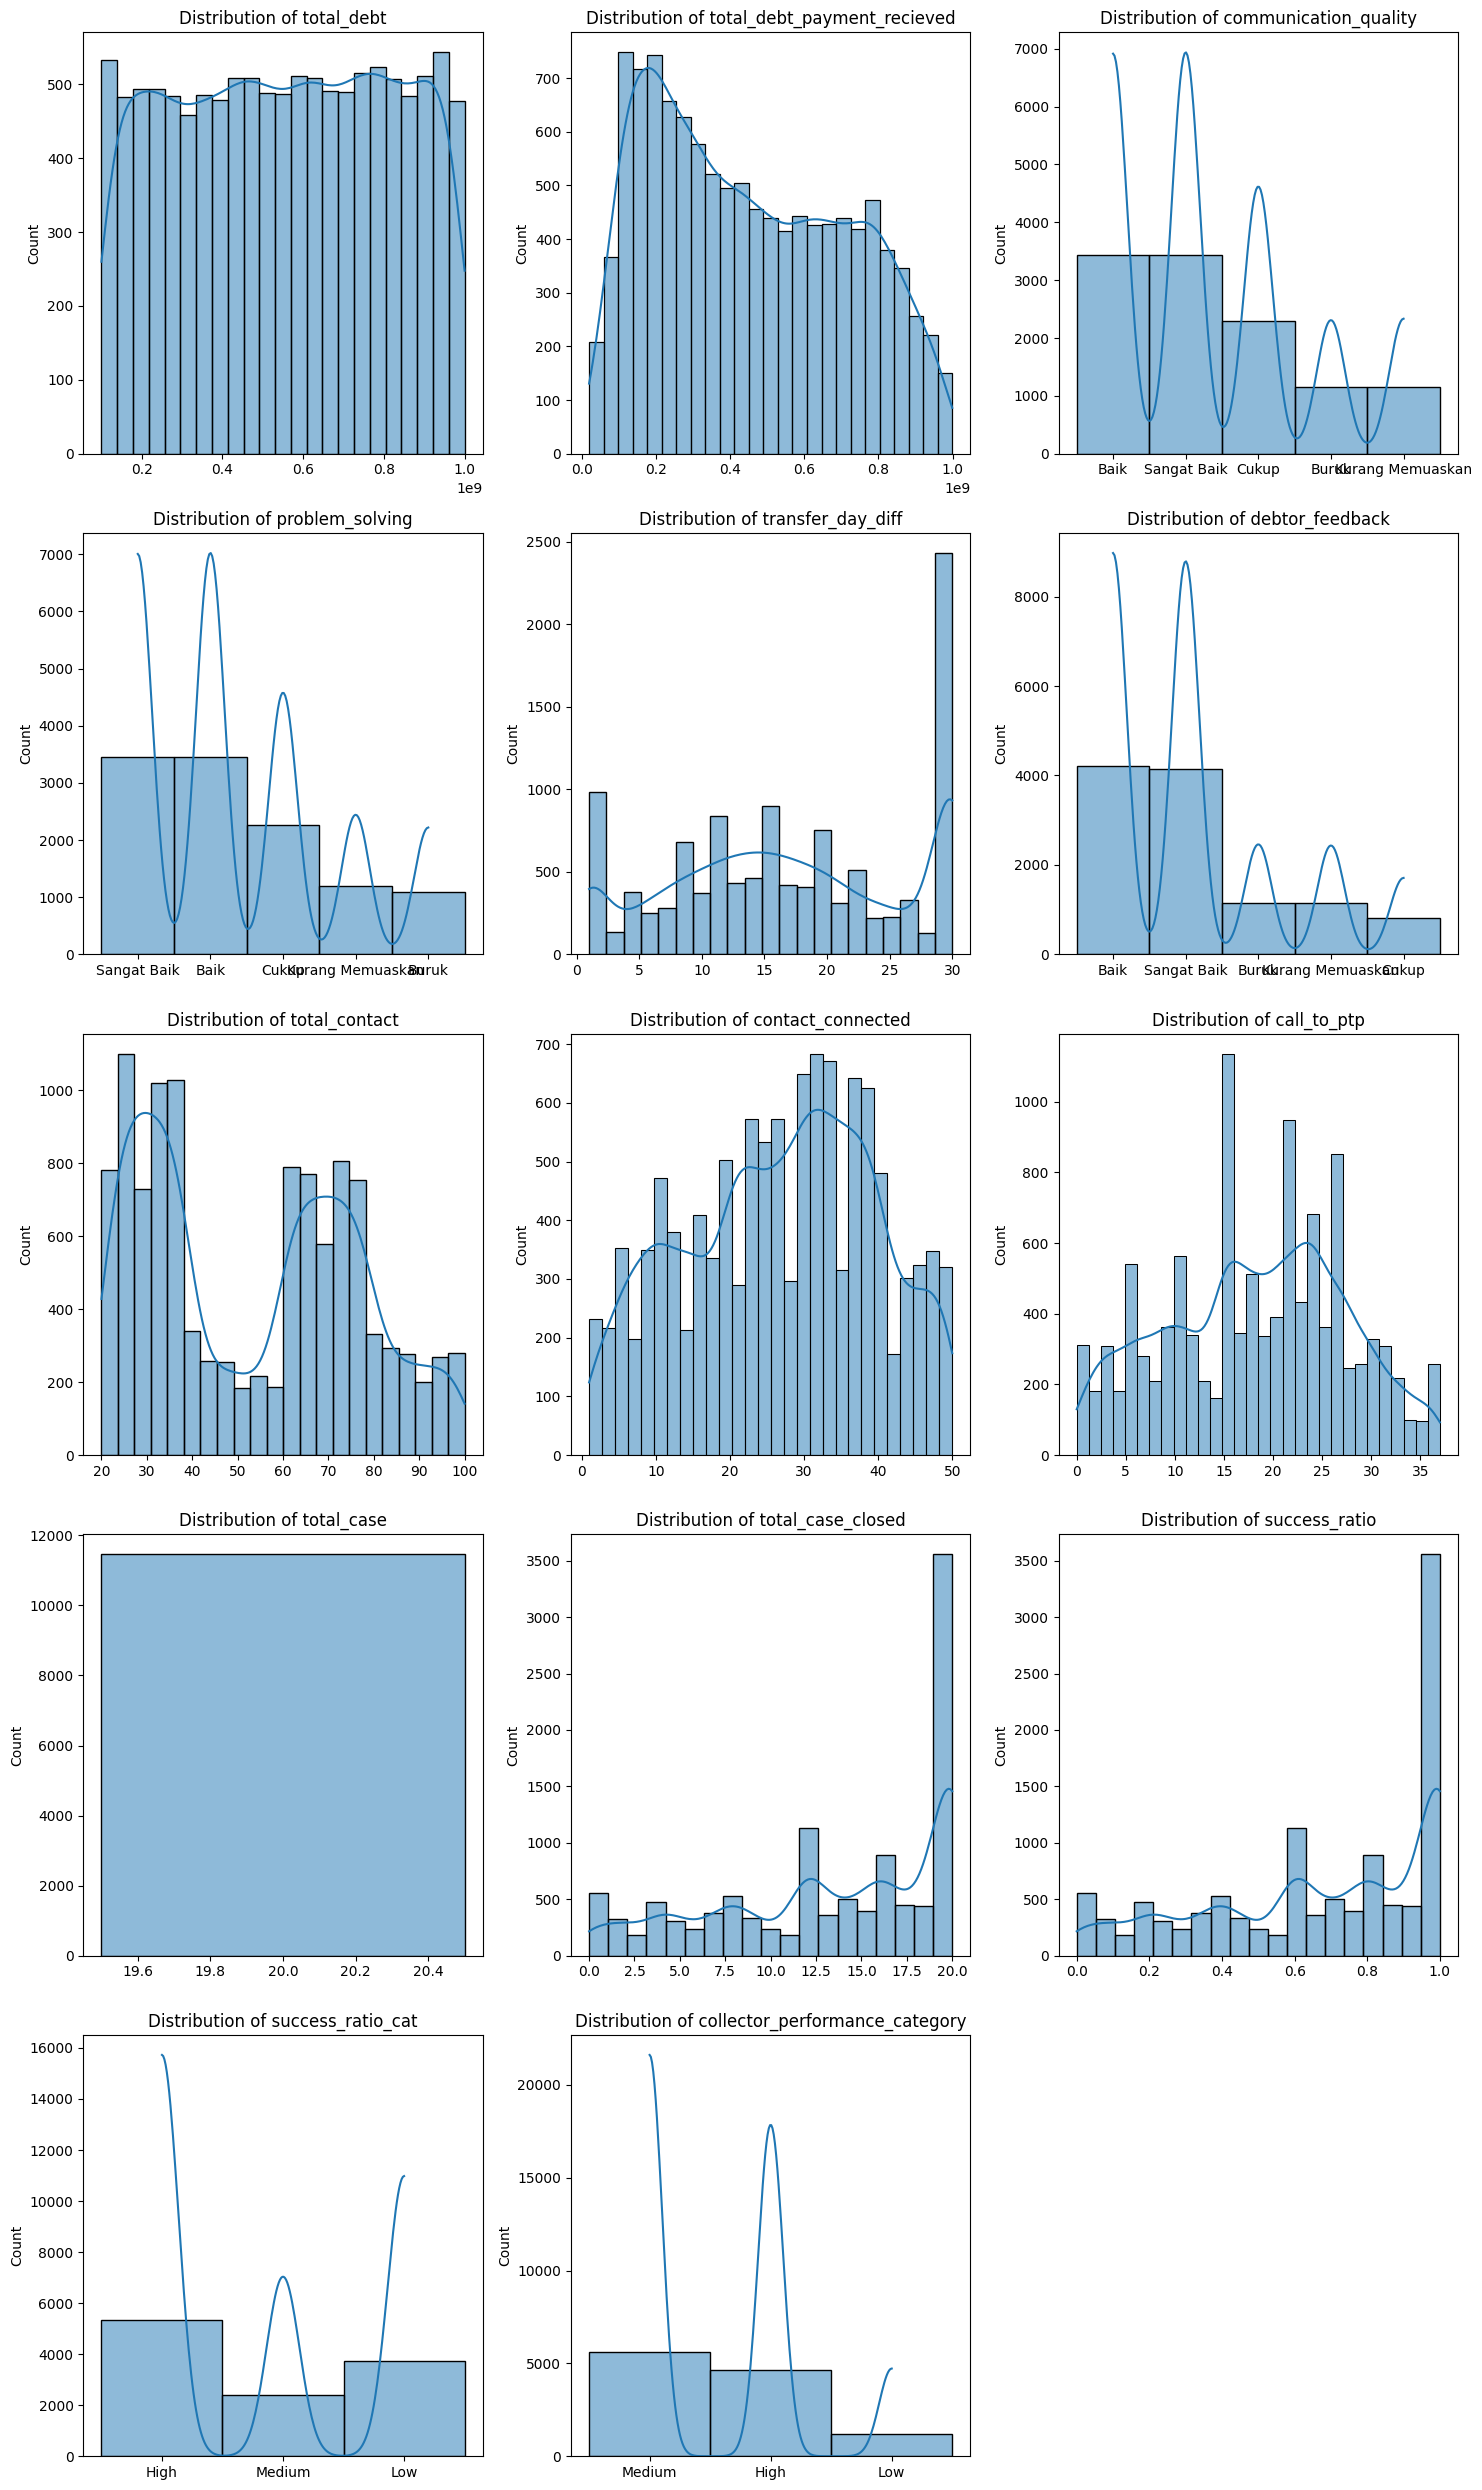

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(x=df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Distribution of total debt repayment value received per category
Using barplots to show how the data spreads between the total debt charged by the debt collector and how much he can collect for each performance. <br>
**objective**: To analyse the pattern of differences in how much debt is collected by debt collectors.

/tmp/ipython-input-4014331705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4014331705.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


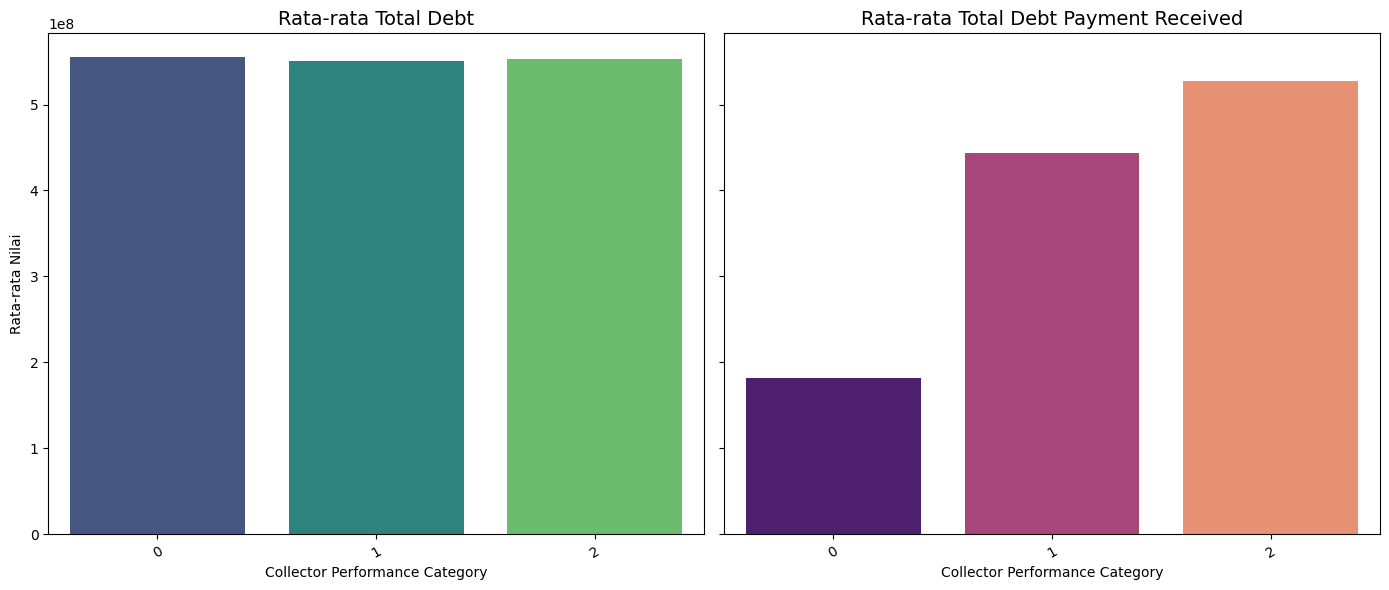

In [ ]:
# hitung rata-rata per kategori
avg_metrics = df_cleaned.groupby("collector_performance_category")[["total_debt", "total_debt_payment_recieved"]].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# plot rata-rata total_debt
sns.barplot(
    data=avg_metrics,
    x="collector_performance_category",
    y="total_debt",
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Rata-rata Total Debt", fontsize=14)
axes[0].set_xlabel("Collector Performance Category")
axes[0].set_ylabel("Rata-rata Nilai")
axes[0].tick_params(axis='x', rotation=30)

# plot rata-rata total_debt_payment_received
sns.barplot(
    data=avg_metrics,
    x="collector_performance_category",
    y="total_debt_payment_recieved",
    palette="magma",
    ax=axes[1]
)
axes[1].set_title("Rata-rata Total Debt Payment Received", fontsize=14)
axes[1].set_xlabel("Collector Performance Category")
axes[1].set_ylabel("")  # biar tidak dobel
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

**Insight**:


*   There is a clear difference in how high performers can collect more debt than others.
*   Total debt looks the same for all categories, indicating that the distribution of collection tasks may still be random (not performance adjusted => high performance is given more difficult/higher total debt tasks).



#### Problem Solving, Communication quality and success ratio analysis
Using clustered bar charts because we don't just want to show the distribution of that 3 aspects, but we also want to give the context of the data distribution for each performance category.<br>
**objective**: to uncover patterns of differences in how communication skills, problem solving and success ratio of each category of performance


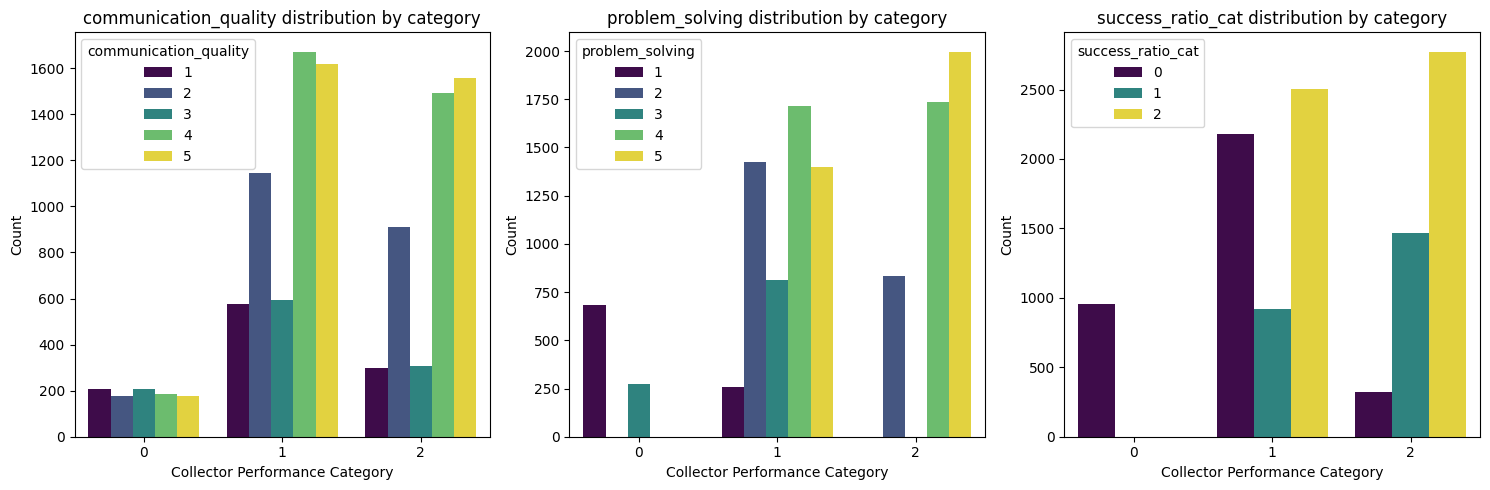

In [ ]:
categorical_cols_to_plot = ['communication_quality', 'problem_solving', 'success_ratio_cat']
num_cols = 3
num_rows = (len(categorical_cols_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_plot):
    sns.countplot(x='collector_performance_category', hue=col, data=df_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} distribution by category')
    axes[i].set_xlabel('Collector Performance Category')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insights**:
*   The character pattern of low-performing collectors is clearly defined: they consistently score at the lowest level across all evaluated aspects.
*   Medium and high performers exhibit relatively similar character patterns across the three assessed dimensions. However, nuanced differences emerge upon closer inspection:.<br> **Communication skills aspect** : Medium performers tend to have a higher number of collectors with excellent communication scores compared to high performers. However, high performers show greater consistency, with fewer individuals scoring poorly in this aspect.<br>**Problem solving aspect**: High performers dominate at the excellent level and rarely fall into the poor category. In contrast, while some medium performers match the excellence of high performers, a significant portion still falls into mid or poor problem-solving categories—indicating greater variability and inconsistency. <br> **Success ratio aspect**: Both medium and high performers demonstrate a similarly high frequency of excellent success ratios. However, medium performers also show a notable number of collectors with poor success ratios, suggesting a wider performance spread and potential reliability concerns.

While medium and high performers **share similar overall patterns**, high performers demonstrate **greater consistency** and fewer weaknesses across key dimensions. Medium performers show pockets of excellence—especially in communication—but also **reveal more variability and risk**, particularly in problem-solving and success ratio. This suggests that high performance is not just about peak scores, but about minimizing low ones.



In [ ]:
df_cleaned.head()

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4             61   
6                 5                 18                4             63   
8                 4                 10                5             74   
9                 4                 12                5             93   
10                5                  9                5             64   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0                  31           22          20                 17   
6                  48           21          20                 16   
8                  23           15          20                 12   
9                  40           19          20                 15   
10                 41           22          20                 17   

    success_ratio  success_ratio_cat  collector_performance_category  
0            0.85                  2                               1  
6            0.80                  2                               1  
8            0.60                  1                               1  
9            0.75                  1                               1  
10           0.85                  2                               1

### Spot the difference in "character" for each category using plot violins

Violin plots are used because they not only show a summary of the spread of data like a boxplot, but also show how the distribution of data is formed. Wider violin sections show areas with higher data density (more values clustered in the range), while narrower sections show areas with more sparse data.

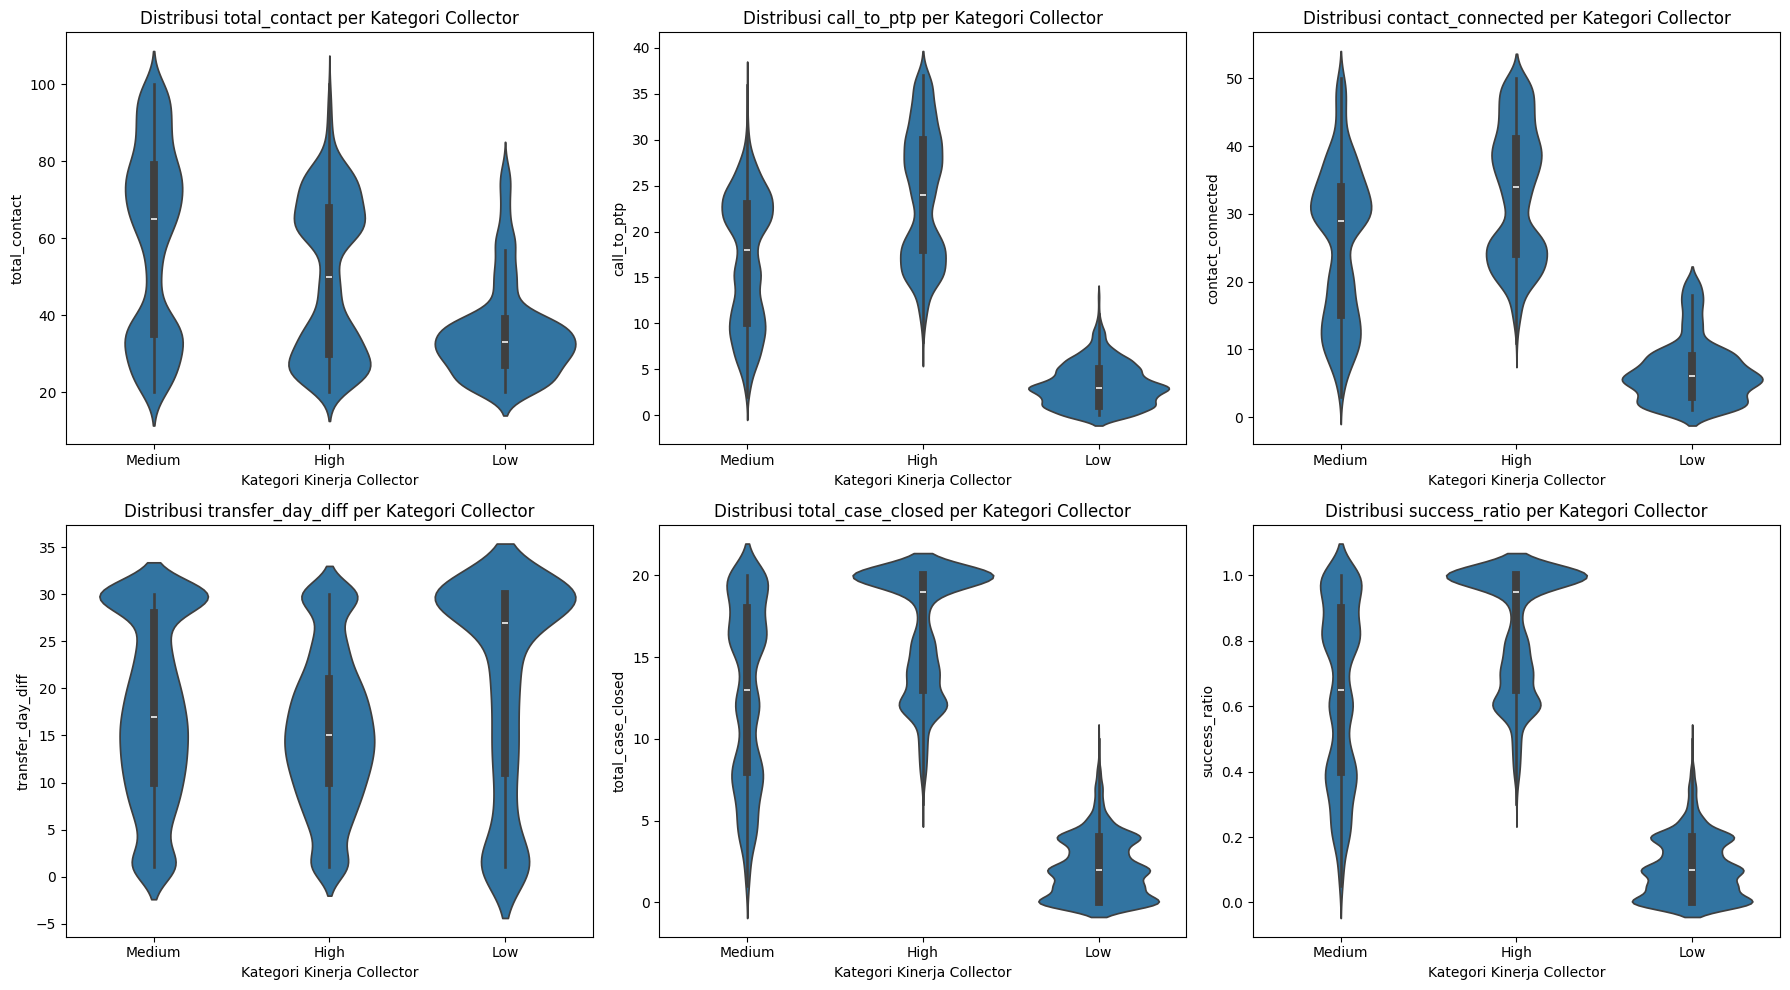

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# daftar variabel numerik yang mau diplot
num_vars = [
    "total_contact",
    "call_to_ptp",
    "contact_connected",
    "transfer_day_diff",
    "total_case_closed",
    "success_ratio"
]

# bikin grid otomatis (misalnya 2 baris x 3 kolom)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, var in zip(axes.flatten(), num_vars):
    sns.violinplot(
        data=df,
        x="collector_performance_category",
        y=var,
        ax=ax
    )
    ax.set_xlabel("Kategori Kinerja Collector")
    ax.set_ylabel(var)
    ax.set_title(f"Distribusi {var} per Kategori Collector")

plt.tight_layout()
plt.show()


**Insight**:
*   **Low-performing collectors** show a consistently narrow value range across most variables, indicating limited capability. An exception is found in the transfer day difference, where their values are disproportionately high—often clustering above 25 days. Since a higher transfer day difference reflects slower resolution, this reinforces their poor performance in that aspect.
*   **Medium vs High Performance Comparison:** Medium and high performers exhibit similar value ranges across variables. However, high performers tend to concentrate in more favorable zones. For example, in the variable measuring the effectiveness of converting contacts into payment promises, both groups exert comparable effort (total contacts), but high performers demonstrate significantly better conversion rates—indicating superior efficiency
*   **Case Closure Effectiveness** This pattern extends to the total cases closed. High performers, who secure more payment promises, also close more cases overall—outpacing both medium and low performers. This suggests a strong correlation between promise conversion and final resolution success.


### Correlation matrix visualisation with heatmap

Overall, the collector_performance_category variable is most influenced by success_ratio(0.65), call_to_ptp(0.65), and contact_connected(0.56). These three variables have a high correlation and show that success in connecting contacts, getting payment commitments, and achieving a high success ratio are key factors in determining a debt collector's performance category.

The variable problem_solving(0.49) also contributes, but with a lower influence. Collectors' problem-solving skills play a role in their performance, although not as strongly as the variables related to success and calls.


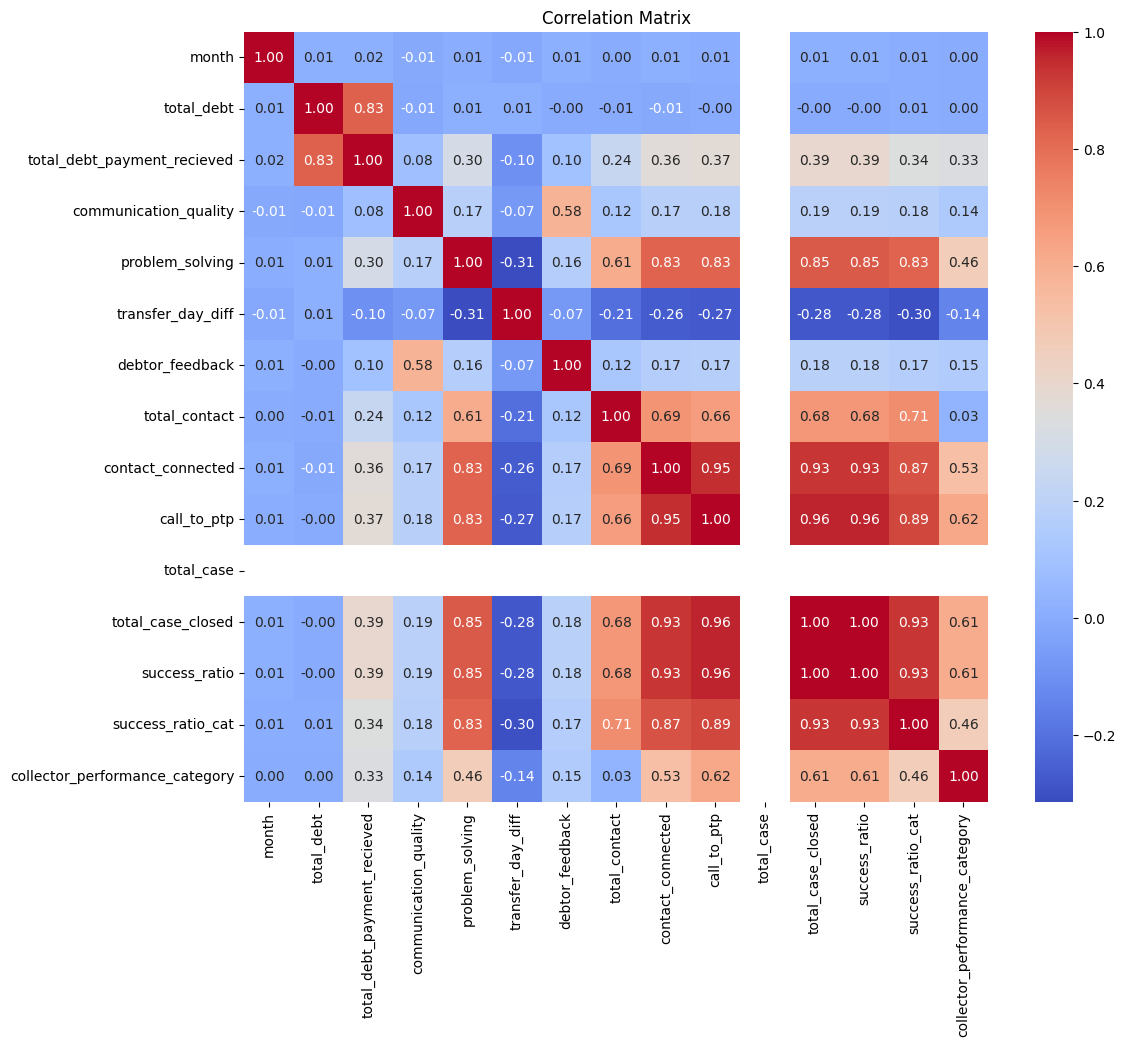

In [ ]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Target variable distribution

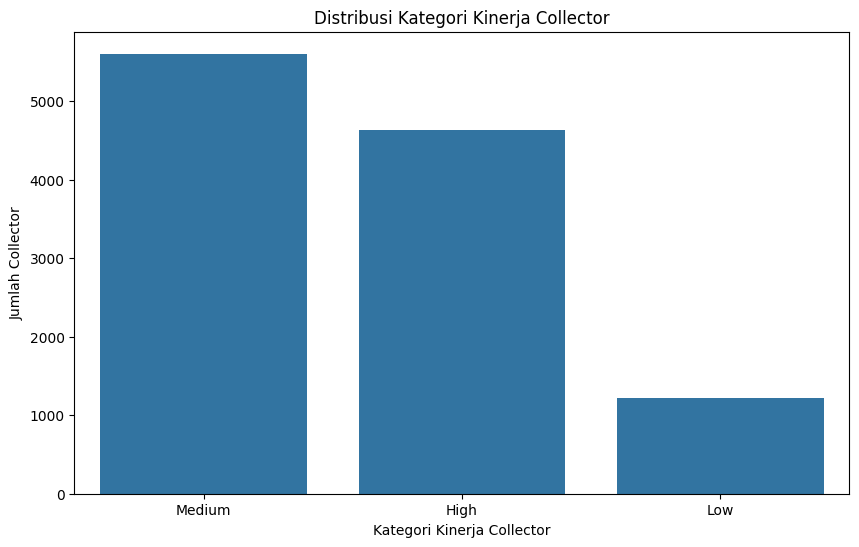

collector_performance_category
Medium    5605
High      4630
Low       1225
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='collector_performance_category', data=df)
plt.title('Distribusi Kategori Kinerja Collector')
plt.xlabel('Kategori Kinerja Collector')
plt.ylabel('Jumlah Collector')
plt.show()

category_counts = df['collector_performance_category'].value_counts()
category_counts

## Feature Engineering

1.   **Hypothesis: RPC_rate**<br>
Rationale: Based on the correlation between contact_connected and total_contact, where successful contact plays a crucial role in the debt collection process. Therefore, RPC_rate was created to measure how effective a collector is at reaching the right party, which is expected to contribute positively to performance.
2.   **Hypothesis: PTP_rate**<br>
The strong correlation between call_to_ptp and contact_connected with the target variable indicates that the number of calls resulting in a payment promise is important in assessing collector performance. By measuring the ratio PTP_rate, we can evaluate how successful a collector is at convincing debtors to commit to repayment.
Given the high correlation of these variables, my hypothesis is that PTP_rate will also show a strong correlation, since it is an aggregation of highly correlated variables.
3.  **Hypothesis: recovery_rate**<br>
A collector’s effectiveness in recovering debt is directly related to their performance — the higher the recovery compared to the total debt, the better the performance.
Observing the strong correlation between total_case_closed and success_ratio with the collector performance category, it is clear that a collector’s ability to close cases is an important factor. Moreover, the variable total_debt_payment_received shows an interesting correlation with both total_case_closed and success_ratio. Based on this, my hypothesis is that the recovery_rate variable will also demonstrate a significant correlation.

In [ ]:
df_cleaned['RPC_rate'] = (df_cleaned['contact_connected'] / df_cleaned['total_contact']) * 100
df_cleaned['PTP_rate'] = (df_cleaned['call_to_ptp'] / df_cleaned['contact_connected']) * 100
df_cleaned['recovery_rate'] = (df_cleaned['total_debt_payment_recieved'] / df_cleaned['total_debt']) * 100

In [ ]:
df_cleaned.head(20)

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   
11 2024-12-01   213678503                    192147497                      1   
13 2024-02-01   456302046                    418016361                      4   
14 2024-03-01   648623242                    199006647                      1   
16 2024-05-01   495834977                    408753565                      5   
18 2024-07-01   993054675                    924285867                      5   
19 2024-08-01   863250740                    793258731                      5   
20 2024-09-01   591121794                    170145728                      2   
21 2024-10-01   771468391                    736559850                      3   
22 2024-11-01   498999315                    200325882                      2   
23 2024-12-01   598053733                    562678258                      4   
24 2024-01-01   441839457                    424912903                      5   
27 2024-04-01   669709127                    188075812                      4   
28 2024-05-01   615086051                    568000589                      5   
29 2024-06-01   739981991                    719753610                      5   
31 2024-08-01   285704474                    281565388                      2   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4             61   
6                 5                 18                4             63   
8                 4                 10                5             74   
9                 4                 12                5             93   
10                5                  9                5             64   
11                2                 30                1             66   
13                2                 29                4             48   
14                3                  6                1             29   
16                2                 20                5             43   
18                4                 15                5             73   
19                4                 10                5             82   
20                3                  4                4             38   
21                2                  1                3             45   
22                3                 30                2             24   
23                4                  6                5             87   
24                4                 21                5             92   
27                3                 30                5             35   
28                4                 25                4             77   
29                5                 10                5             95   
31                4                  9                2             89   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0                  31           22          20                 17   
6                  48           21          20                 16   
8                  23           15          20                 12   
9                  40           19          20                 15   
10                 41           22          20                 17   
11                 15           11          20                  8   
13                 20           11          20                  8   
14                  9            6          20                  4   
16                 25           18          20                 14   
18                 28           21          20               

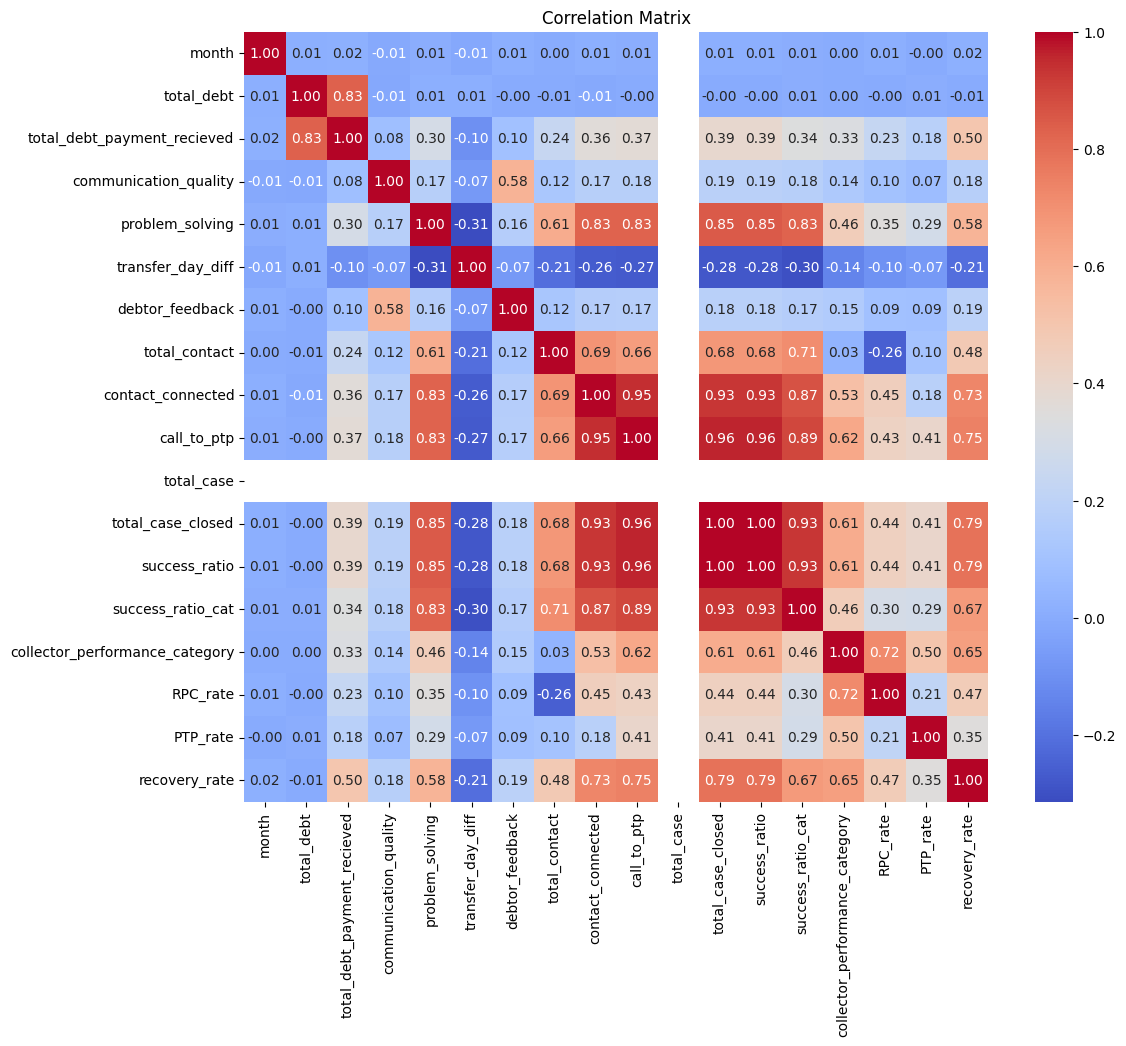

In [ ]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Terbukti Bahwa 3 fitur yang saya buat memiliki nilai korelasi yang menarik

*   recovery_rate = 0.69
*   ptp_rate = 0.52
*   rpc_rate = 0.73

## Standarisasi Z-score


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['total_contact', 'contact_connected', 'call_to_ptp', 	'RPC_rate', 'PTP_rate', 'recovery_rate', 'success_ratio']

df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

print(df_cleaned.head())

        month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4       0.355570   
6                 5                 18                4       0.442615   
8                 4                 10                5       0.921361   
9                 4                 12                5       1.748286   
10                5                  9                5       0.486137   

    contact_connected  call_to_ptp  total_case  total_case_closed  \

In [ ]:
df_cleaned.head()

month  total_debt  total_debt_payment_recieved  communication_quality  \
0  2024-01-01   633037062                    558678271                      4   
6  2024-07-01   603227968                    490479132                      4   
8  2024-09-01   467190127                    441807338                      5   
9  2024-10-01   525743251                    503432886                      4   
10 2024-11-01   409447259                    380511691                      5   

    problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
0                 5                 25                4       0.355570   
6                 5                 18                4       0.442615   
8                 4                 10                5       0.921361   
9                 4                 12                5       1.748286   
10                5                  9                5       0.486137   

    contact_connected  call_to_ptp  total_case  total_case_closed  \
0            0.312544     0.387351          20                 17   
6            1.673274     0.275137          20                 16   
8           -0.327799    -0.398145          20                 12   
9            1.032931     0.050710          20                 15   
10           1.112974     0.387351          20                 17   

    success_ratio  success_ratio_cat  collector_performance_category  \
0        0.579890                  2                               1   
6        0.415079                  2                               1   
8       -0.244164                  1                               1   
9        0.250268                  1                               1   
10       0.579890                  2                               1   

    RPC_rate  PTP_rate  recovery_rate  
0  -0.132446  0.290891       0.242826  
6   1.013902 -1.953605      -0.054004  
8  -1.024309 -0.183308       0.512674  
9  -0.485282 -1.644363       0.563517  
10  0.465915 -1.136503       0.442836

In [ ]:
df_cleaned[['total_contact', 'contact_connected', 'call_to_ptp', 	'RPC_rate', 'PTP_rate', 'recovery_rate', 'success_ratio']].head()

total_contact  contact_connected  call_to_ptp  RPC_rate  PTP_rate  \
0        0.355570           0.312544     0.387351 -0.132446  0.290891   
6        0.442615           1.673274     0.275137  1.013902 -1.953605   
8        0.921361          -0.327799    -0.398145 -1.024309 -0.183308   
9        1.748286           1.032931     0.050710 -0.485282 -1.644363   
10       0.486137           1.112974     0.387351  0.465915 -1.136503   

    recovery_rate  success_ratio  
0        0.242826       0.579890  
6       -0.054004       0.415079  
8        0.512674      -0.244164  
9        0.563517       0.250268  
10       0.442836       0.579890

## Splitting Dataset

Data splitting was done with a ratio of **70/30** in accordance with previous studies

### Splitting Dataset


In [ ]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('collector_performance_category', axis=1)
y = df_cleaned['collector_performance_category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Splitting after XGBoost Threshold = 0.01


In [ ]:
X = df_cleaned.drop(columns=['total_case', 'success_ratio_cat', 'success_ratio','collector_performance_category'])
y = df_cleaned['collector_performance_category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

month  total_debt  total_debt_payment_recieved  communication_quality  \
9458       3   871260037                    728328290                      5   
825       10   491623220                    425912345                      5   
780        1   350034423                    302792387                      2   
10577      6   198001565                    160070482                      2   
2718       7   597091743                    485734984                      5   
...      ...         ...                          ...                    ...   
7350       7   374644415                    129033356                      3   
10592      9   712258264                    667980513                      5   
10979     12   959573683                    897814834                      5   
1763      12   506500951                    198309108                      5   
3471       4   816295890                    816295890                      2   

       problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
9458                 5                  1                4       1.573748   
825                  4                 26                5      -1.124474   
780                  4                 13                5      -0.906876   
10577                2                 30                2      -0.776317   
2718                 2                 30                4      -1.298553   
...                ...                ...              ...            ...   
7350                 3                  5                1      -0.906876   
10592                5                  5                5       0.572795   
10979                4                  8                5       1.660788   
1763                 3                 30                5      -0.384639   
3471                 5                  9                5      -0.732797   

       contact_connected  call_to_ptp  total_case_closed  RPC_rate  PTP_rate  \
9458            1.112429     0.612294                 19 -0.346785 -0.732303   
825            -0.328065    -0.173360                 13  1.420760  0.535366   
780            -0.568147    -0.397832                 12  0.395725  0.624978   
10577          -0.087983    -0.622304                 10  0.928265 -1.436078   
2718           -0.408092    -0.846777                  8  1.893713 -1.436078   
...                  ...          ...                ...       ...       ...   
7350           -1.768559    -1.744666                  2 -1.722333 -0.611656   
10592           1.432538     0.275585                 16  0.652459 -1.710885   
10979           0.072072    -0.397832                 12 -1.038037 -1.141641   
1763           -0.568147    -0.846777                  8 -0.374478 -1.023867   
3471            0.712291     0.949002                 20  2.090171  0.624978   

       recovery_rate  
9458        0.042700  
825         0.172671  
780         0.167099  
10577      -0.074985  
2718       -0.053298  
...              ...  
7350       -2.059428  
10592       0.478436  
10979       0.469046  
1763       -1.857944  
3471        0.744297  

[8154 rows x 14 columns]

In [ ]:
y_train

9458     1
825      2
780      2
10577    1
2718     1
        ..
7350     0
10592    1
10979    1
1763     1
3471     2
Name: collector_performance_category, Length: 8154, dtype: int64

### Splitting after XGBoost Threshold = 0.045

In [ ]:
X = df_cleaned.drop(columns=['total_case', 'success_ratio_cat', 'success_ratio', 'communication_quality', 'month', 'collector_performance_category'])
y = df_cleaned['collector_performance_category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

total_debt  total_debt_payment_recieved  problem_solving  \
9458    871260037                    728328290                5   
825     491623220                    425912345                4   
780     350034423                    302792387                4   
10577   198001565                    160070482                2   
2718    597091743                    485734984                2   
...           ...                          ...              ...   
7350    374644415                    129033356                3   
10592   712258264                    667980513                5   
10979   959573683                    897814834                4   
1763    506500951                    198309108                3   
3471    816295890                    816295890                5   

       transfer_day_diff  debtor_feedback  total_contact  contact_connected  \
9458                   1                4       1.573748           1.112429   
825                   26                5      -1.124474          -0.328065   
780                   13                5      -0.906876          -0.568147   
10577                 30                2      -0.776317          -0.087983   
2718                  30                4      -1.298553          -0.408092   
...                  ...              ...            ...                ...   
7350                   5                1      -0.906876          -1.768559   
10592                  5                5       0.572795           1.432538   
10979                  8                5       1.660788           0.072072   
1763                  30                5      -0.384639          -0.568147   
3471                   9                5      -0.732797           0.712291   

       call_to_ptp  total_case_closed  RPC_rate  PTP_rate  recovery_rate  
9458      0.612294                 19 -0.346785 -0.732303       0.042700  
825      -0.173360                 13  1.420760  0.535366       0.172671  
780      -0.397832                 12  0.395725  0.624978       0.167099  
10577    -0.622304                 10  0.928265 -1.436078      -0.074985  
2718     -0.846777                  8  1.893713 -1.436078      -0.053298  
...            ...                ...       ...       ...            ...  
7350     -1.744666                  2 -1.722333 -0.611656      -2.059428  
10592     0.275585                 16  0.652459 -1.710885       0.478436  
10979    -0.397832                 12 -1.038037 -1.141641       0.469046  
1763     -0.846777                  8 -0.374478 -1.023867      -1.857944  
3471      0.949002                 20  2.090171  0.624978       0.744297  

[8154 rows x 12 columns]

In [ ]:
y_train

9458     1
825      2
780      2
10577    1
2718     1
        ..
7350     0
10592    1
10979    1
1763     1
3471     2
Name: collector_performance_category, Length: 8154, dtype: int64

### Splitting after XGBoost Threshold = 0.002

In [ ]:
X = df_cleaned.drop(columns=['total_case', 'success_ratio_cat', 'success_ratio','collector_performance_category'])
y = df_cleaned['collector_performance_category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

month  total_debt  total_debt_payment_recieved  communication_quality  \
9458       3   871260037                    728328290                      5   
825       10   491623220                    425912345                      5   
780        1   350034423                    302792387                      2   
10577      6   198001565                    160070482                      2   
2718       7   597091743                    485734984                      5   
...      ...         ...                          ...                    ...   
7350       7   374644415                    129033356                      3   
10592      9   712258264                    667980513                      5   
10979     12   959573683                    897814834                      5   
1763      12   506500951                    198309108                      5   
3471       4   816295890                    816295890                      2   

       problem_solving  transfer_day_diff  debtor_feedback  total_contact  \
9458                 5                  1                4       1.573748   
825                  4                 26                5      -1.124474   
780                  4                 13                5      -0.906876   
10577                2                 30                2      -0.776317   
2718                 2                 30                4      -1.298553   
...                ...                ...              ...            ...   
7350                 3                  5                1      -0.906876   
10592                5                  5                5       0.572795   
10979                4                  8                5       1.660788   
1763                 3                 30                5      -0.384639   
3471                 5                  9                5      -0.732797   

       contact_connected  call_to_ptp  total_case_closed  RPC_rate  PTP_rate  \
9458            1.112429     0.612294                 19 -0.346785 -0.732303   
825            -0.328065    -0.173360                 13  1.420760  0.535366   
780            -0.568147    -0.397832                 12  0.395725  0.624978   
10577          -0.087983    -0.622304                 10  0.928265 -1.436078   
2718           -0.408092    -0.846777                  8  1.893713 -1.436078   
...                  ...          ...                ...       ...       ...   
7350           -1.768559    -1.744666                  2 -1.722333 -0.611656   
10592           1.432538     0.275585                 16  0.652459 -1.710885   
10979           0.072072    -0.397832                 12 -1.038037 -1.141641   
1763           -0.568147    -0.846777                  8 -0.374478 -1.023867   
3471            0.712291     0.949002                 20  2.090171  0.624978   

       recovery_rate  
9458        0.042700  
825         0.172671  
780         0.167099  
10577      -0.074985  
2718       -0.053298  
...              ...  
7350       -2.059428  
10592       0.478436  
10979       0.469046  
1763       -1.857944  
3471        0.744297  

[8154 rows x 14 columns]

In [ ]:
y_train

9458     1
825      2
780      2
10577    1
2718     1
        ..
7350     0
10592    1
10979    1
1763     1
3471     2
Name: collector_performance_category, Length: 8154, dtype: int64

### SMOTE For Multi-Class Imbalance

Melakukan SMOTE berdasarkan penelitian terdahulu dikarenakan adanya feature imbalance pada variabel label `collection performance category` dan penelitian terdahulu menggunakan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTENC

categorical_columns = ['problem_solving', 'debtor_feedback']
categorical_indices = [X.columns.get_loc(col) for col in categorical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

print("Distribusi kelas sebelum oversampling:")
print(y_train.value_counts())

print("\nDistribusi kelas setelah oversampling:")
print(pd.Series(y_resampled).value_counts())

Distribusi kelas sebelum oversampling:
collector_performance_category
1    4118
2    3336
0     700
Name: count, dtype: int64

Distribusi kelas setelah oversampling:
collector_performance_category
1    4118
2    4118
0    4118
Name: count, dtype: int64


In [ ]:
X_resampled

total_debt  total_debt_payment_recieved  problem_solving  \
0       359120175                    344385689                2   
1       816937789                    655532839                4   
2       106789626                     98002697                5   
3       579850166                    579850166                5   
4       412051832                    408673192                5   
...           ...                          ...              ...   
12349   803797995                    801382445                5   
12350   942120278                    941627354                5   
12351   779090379                    731796964                5   
12352   115953258                     98203588                2   
12353   383390892                    317609697                2   

       transfer_day_diff  debtor_feedback  total_contact  contact_connected  \
0                     14                3      -1.037435          -0.968284   
1                     14                5      -1.255033          -0.248038   
2                     21                2       1.878386           0.232127   
3                     14                4       1.356150           1.032401   
4                     13                4       0.703354           1.832675   
...                  ...              ...            ...                ...   
12349                 11                5      -0.278401           0.311153   
12350                 22                3      -0.743175           0.526606   
12351                 12                5      -0.932981           0.328175   
12352                  9                4      -0.901630           0.147277   
12353                 22                5      -1.082074          -0.157460   

       call_to_ptp  total_case_closed  RPC_rate  PTP_rate  recovery_rate  
0        -0.846777                  8 -0.091185  0.487574       0.568827  
1        -0.061123                 14  2.090171  0.624978      -0.100660  
2         0.387821                 17 -1.016314  0.487574       0.392400  
3         0.724530                 20 -0.276674 -0.405550       0.744297  
4         0.500057                 18  0.845940 -1.765846       0.709230  
...            ...                ...       ...       ...            ...  
12349     0.492464                 16  0.788486  0.562991       0.731467  
12350     0.706556                 19  1.881133  0.523154       0.742062  
12351     0.544968                 18  2.055421  0.624978       0.484691  
12352     0.308488                 16  1.690935  0.509157       0.089367  
12353     0.012739                 14  1.798269  0.556593       0.010927  

[12354 rows x 12 columns]

In [ ]:
print("Jumlah data X_train:", len(X_train))
print("Jumlah data y_train:", len(y_train))
print("Jumlah data X_test:", len(X_test))
print("Jumlah data y_test:", len(y_test))

Jumlah data X_train: 8154
Jumlah data y_train: 8154
Jumlah data X_test: 3495
Jumlah data y_test: 3495


## XGBoost Feature Importance

Implementasi XGBoost feature importance dan visualisasi nilai feature importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

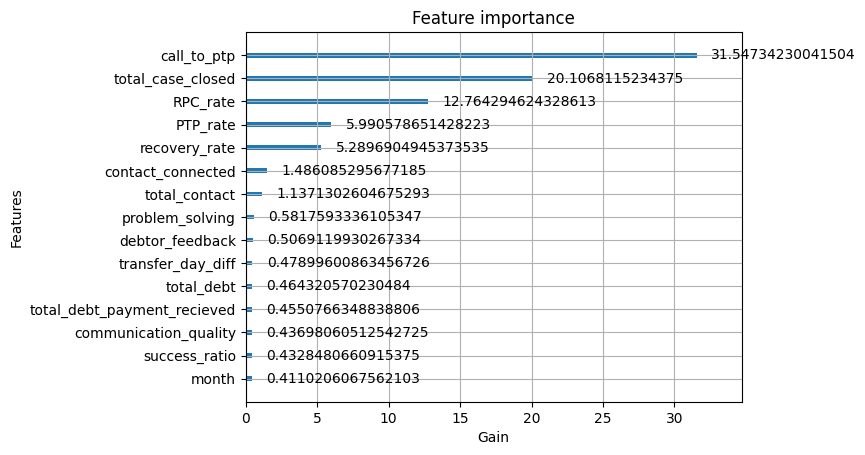

In [ ]:
plot_importance(model, importance_type = 'gain', xlabel = 'Gain')
plt.show()

## Hyperparameter Tuning

### Hyperparameter Tuning (LGBM)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'max_depth': np.random.randint(10, 51, size=10),  # Random integers between 10 and 50
    'min_child_weight': [1e-5, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e4],  # List of values for min_child_weight
    'subsample': np.random.uniform(0.2, 0.8, size=10),  # Random floats from [0.2, 0.8]
    'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100]  # List of values for regularization
}

lgbm = lgb.LGBMClassifier()

random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 8400, number of used features: 16
[LightGBM] [Info] Start training from score -2.222542
[LightGBM] [Info] Start training from score -0.720421
[LightGBM] [Info] Start training from score -0.903574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

### Hyperparameter Tuning (Random Forest Classifier)


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

rf = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [ )]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_distributions = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,          # Number of parameter settings sampled
    cv=3,                # Number of cross-validation folds
    verbose=2,           # Verbosity level
    random_state=42,     # Reproducibility
    n_jobs=-1            # Use all processors
)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (ipython-input-680937251.py, line 12)

### Hyperparameter Tuning (Decision Tree Classifier)


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)

param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [int(x) for x in range(3, 21)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))


NameError: name 'X_train' is not defined

## Modeling

### LightGBM


#### LGBM Threshold 0.045

* Accuracy = 0.9533619456366238
* K-Fold Cross Validation (Average) = 0.9541598454345678

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lgbm_model = LGBMClassifier(
    subsample=0.38902606571513654,
    reg_lambda=5,
    min_child_weight=10,
    max_depth=27)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Latih model menggunakan data latih
lgbm_model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 12354, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMClassifier(max_depth=27, min_child_weight=10, reg_lambda=5,
               subsample=0.38902606571513654)

In [ ]:
predictions = lgbm_model.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9533619456366238

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9533619456366238

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(lgbm_model, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 10484, number of used features: 12
[LightGBM] [Info] Start training from score -2.444161
[LightGBM] [Info] Start training from score -0.683654
[LightGBM] [Info] Start training from score -0.895430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

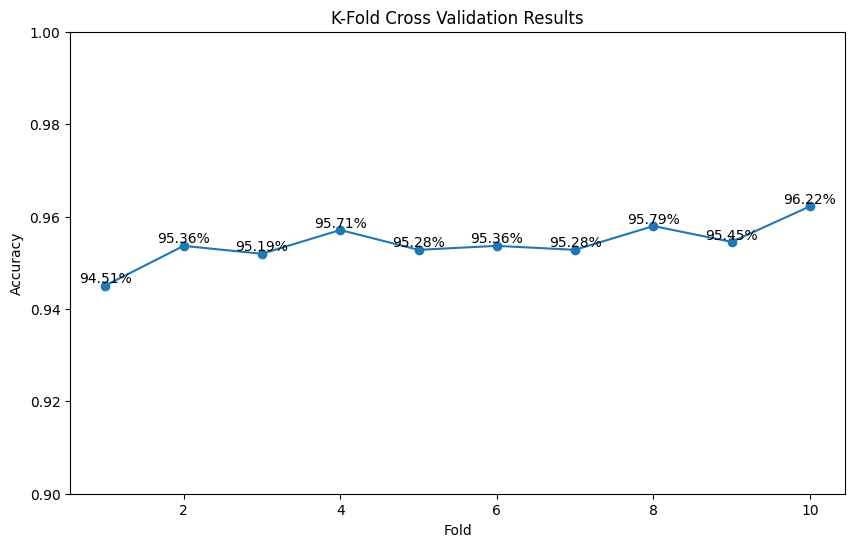

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names

Index(['total_debt', 'total_debt_payment_recieved', 'problem_solving',
       'transfer_day_diff', 'debtor_feedback', 'total_contact',
       'contact_connected', 'call_to_ptp', 'total_case_closed', 'RPC_rate',
       'PTP_rate', 'recovery_rate'],
      dtype='object')

In [ ]:
importances = lgbm_model.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
9                      RPC_rate    0.182062
11                recovery_rate    0.172542
10                     PTP_rate    0.163022
5                 total_contact    0.099509
7                   call_to_ptp    0.087758
0                    total_debt    0.076156
3             transfer_day_diff    0.066637
1   total_debt_payment_recieved    0.052506
8             total_case_closed    0.037037
6             contact_connected    0.027666
4               debtor_feedback    0.024394
2               problem_solving    0.010710


#### LGBM without Feature Engineering

* Accuracy = 0.9296137339055794
* K-Fold Cross Validation (Average) = 0.9328697845228087

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lgbm_model = LGBMClassifier(
    subsample=0.38902606571513654,
    reg_lambda=5,
    min_child_weight=10,
    max_depth=27)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Latih model menggunakan data latih
lgbm_model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 745
[LightGBM] [Info] Number of data points in the train set: 12354, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

LGBMClassifier(max_depth=27, min_child_weight=10, reg_lambda=5,
               subsample=0.38902606571513654)

In [ ]:
predictions = lgbm_model.predict(X_test)
predictions

array([2, 2, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9296137339055794

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9296137339055794

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(lgbm_model, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 745
[LightGBM] [Info] Number of data points in the train set: 10484, number of used features: 9
[LightGBM] [Info] Start training from score -2.444161
[LightGBM] [Info] Start training from score -0.683654
[LightGBM] [Info] Start training from score -0.895430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

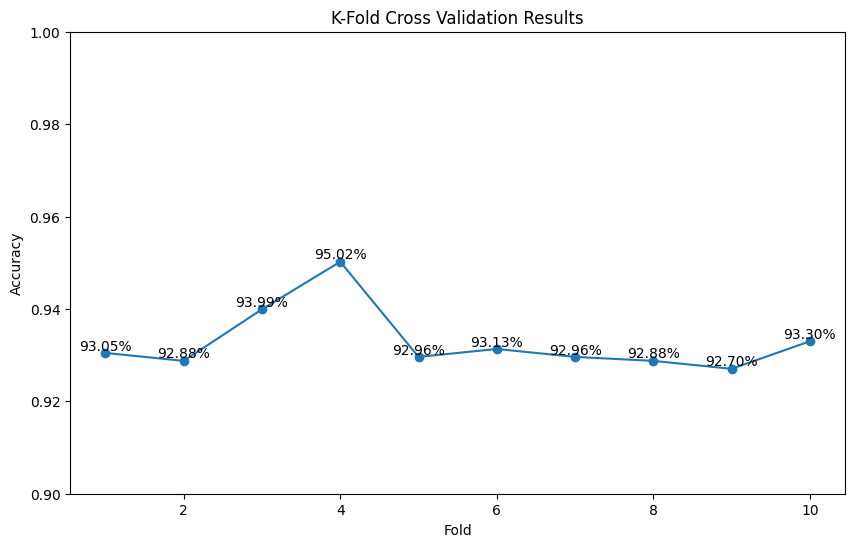

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names

Index(['total_debt', 'total_debt_payment_recieved', 'problem_solving',
       'transfer_day_diff', 'debtor_feedback', 'total_contact',
       'contact_connected', 'call_to_ptp', 'total_case_closed'],
      dtype='object')

In [ ]:
importances = lgbm_model.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                       feature  importance
1  total_debt_payment_recieved    0.229202
0                   total_debt    0.195032
7                  call_to_ptp    0.168616
5                total_contact    0.156788
6            contact_connected    0.103824
3            transfer_day_diff    0.057301
8            total_case_closed    0.045604
2              problem_solving    0.022999
4              debtor_feedback    0.020633


#### LGBM x Feature Engineering X SMOTE X XGboost

* Accuracy = 0.9533619456366238
* K-Fold Cross Validation (Average) = 0.9532152707107354

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lgbm_model = LGBMClassifier(
    subsample=0.38902606571513654,
    reg_lambda=5,
    min_child_weight=10,
    max_depth=27)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Latih model menggunakan data latih
lgbm_model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 12354, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

LGBMClassifier(max_depth=27, min_child_weight=10, reg_lambda=5,
               subsample=0.38902606571513654)

In [ ]:
predictions = lgbm_model.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9533619456366238

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9533619456366238

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(lgbm_model, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 10484, number of used features: 14
[LightGBM] [Info] Start training from score -2.444161
[LightGBM] [Info] Start training from score -0.683654
[LightGBM] [Info] Start training from score -0.895430
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

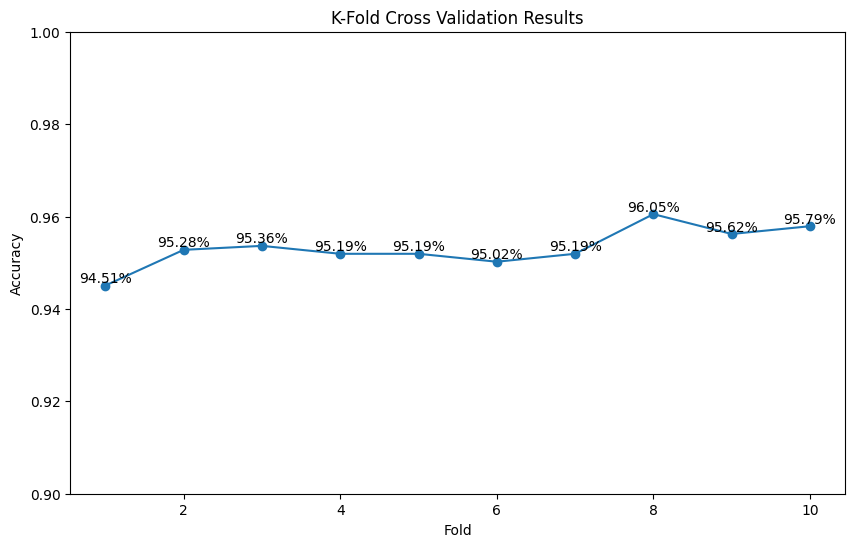

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names

Index(['month', 'total_debt', 'total_debt_payment_recieved',
       'communication_quality', 'problem_solving', 'transfer_day_diff',
       'debtor_feedback', 'total_contact', 'contact_connected', 'call_to_ptp',
       'total_case_closed', 'RPC_rate', 'PTP_rate', 'recovery_rate'],
      dtype='object')

In [ ]:
importances = lgbm_model.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
11                     RPC_rate    0.176497
13                recovery_rate    0.169611
12                     PTP_rate    0.157186
7                 total_contact    0.093713
9                   call_to_ptp    0.081287
1                    total_debt    0.066018
5             transfer_day_diff    0.058234
2   total_debt_payment_recieved    0.043713
0                         month    0.037425
10            total_case_closed    0.035479
8             contact_connected    0.030539
3         communication_quality    0.020808
6               debtor_feedback    0.017964
4               problem_solving    0.011527


#### Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       0.96      0.97      0.97       300
      Medium       0.96      0.95      0.95      1765
        High       0.95      0.95      0.95      1430

    accuracy                           0.95      3495
   macro avg       0.96      0.96      0.96      3495
weighted avg       0.95      0.95      0.95      3495



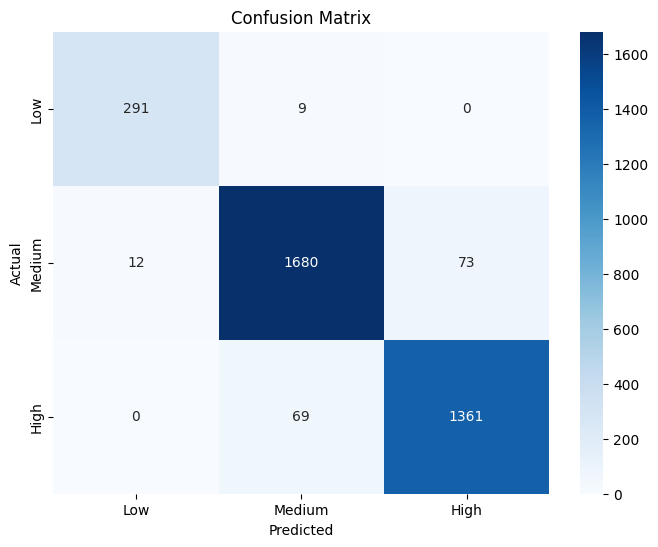

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 291    9    0]
 [  12 1680   73]
 [   0   69 1361]]


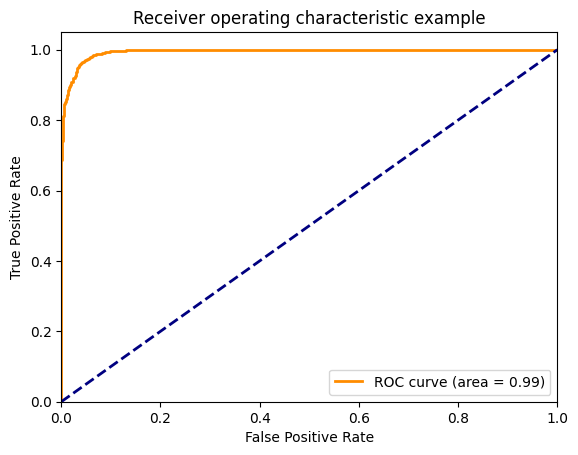

AUC Score (Micro): 0.9962204743747965
AUC Score (Class 0): 0.9995899843505477
AUC Score (Class 1): 0.9925343463950613
AUC Score (Class 2): 0.9942484634010057


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_score = lgbm_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Micro): {roc_auc['micro']}")
for i in range(n_classes):
    print(f"AUC Score (Class {i}): {roc_auc[i]}")

### Random Forest Classifier

#### Random Forest Classifier Threshold = 0.045
* Accuracy = 0.9496423462088698
* Average Accuracy (K-fold) = 0.9474636078049643

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features =  'sqrt', max_depth =  100, bootstrap =  True, random_state =42)

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=2000,
                       random_state=42)

In [ ]:
feature_names = X.columns
feature_names

Index(['total_debt', 'total_debt_payment_recieved', 'problem_solving',
       'transfer_day_diff', 'debtor_feedback', 'total_contact',
       'contact_connected', 'call_to_ptp', 'total_case_closed', 'RPC_rate',
       'PTP_rate', 'recovery_rate'],
      dtype='object')

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
call_to_ptp                  0.184772
RPC_rate                     0.178649
recovery_rate                0.145450
total_case_closed            0.140969
PTP_rate                     0.087351
contact_connected            0.079858
total_contact                0.074594
problem_solving              0.061033
total_debt_payment_recieved  0.019886
total_debt                   0.012695
transfer_day_diff            0.010083
debtor_feedback              0.004659

In [ ]:
predictions = rfc.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9496423462088698

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9496423462088698

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(rfc, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.93991416 0.93991416 0.94678112 0.96223176 0.94678112 0.94420601
 0.94248927 0.95622318 0.94506438 0.95103093]
Average score:  0.9474636078049643


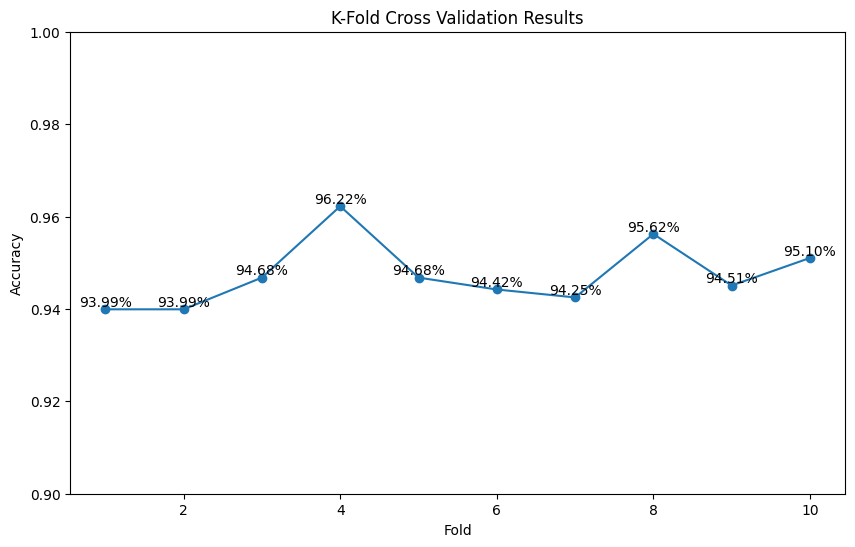

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = rfc.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
7                   call_to_ptp    0.184772
9                      RPC_rate    0.178649
11                recovery_rate    0.145450
8             total_case_closed    0.140969
10                     PTP_rate    0.087351
6             contact_connected    0.079858
5                 total_contact    0.074594
2               problem_solving    0.061033
1   total_debt_payment_recieved    0.019886
0                    total_debt    0.012695
3             transfer_day_diff    0.010083
4               debtor_feedback    0.004659


#### Random Forest Classifier without Feature Engineering
* Accuracy = 0.9012875536480687
* Average Accuracy (K-fold) = 0.9029959588808755

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features =  'sqrt', max_depth =  100, bootstrap =  True, random_state =42)

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=2000,
                       random_state=42)

In [ ]:
feature_names = X.columns
feature_names

Index(['total_debt', 'total_debt_payment_recieved', 'problem_solving',
       'transfer_day_diff', 'debtor_feedback', 'total_contact',
       'contact_connected', 'call_to_ptp', 'total_case_closed'],
      dtype='object')

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
call_to_ptp                  0.281163
total_case_closed            0.197839
total_contact                0.179573
contact_connected            0.133531
problem_solving              0.087125
total_debt_payment_recieved  0.052769
total_debt                   0.035579
transfer_day_diff            0.022647
debtor_feedback              0.009773

In [ ]:
predictions = rfc.predict(X_test)
predictions

array([2, 2, 0, ..., 1, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9012875536480687

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9012875536480687

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(rfc, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.90214592 0.89012876 0.90300429 0.92360515 0.90386266 0.90472103
 0.89871245 0.9055794  0.89527897 0.90292096]
Average score:  0.9029959588808755


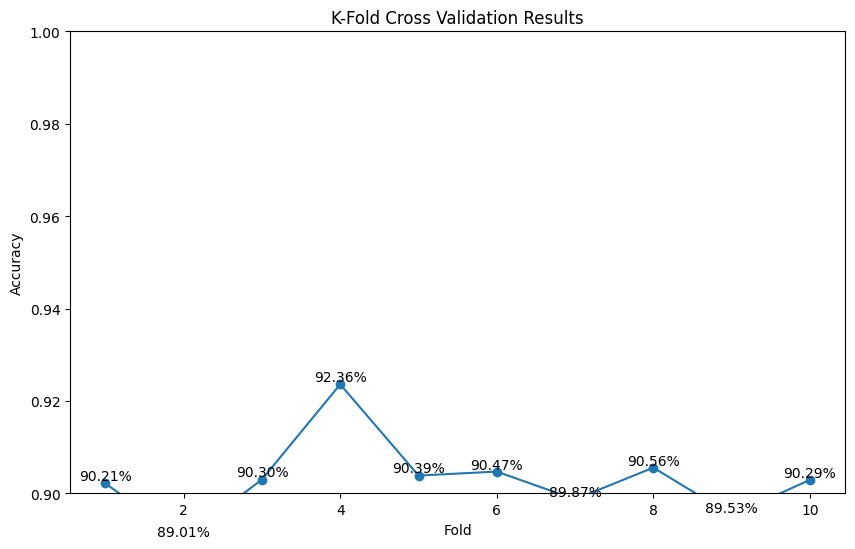

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = rfc.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                       feature  importance
7                  call_to_ptp    0.281163
8            total_case_closed    0.197839
5                total_contact    0.179573
6            contact_connected    0.133531
2              problem_solving    0.087125
1  total_debt_payment_recieved    0.052769
0                   total_debt    0.035579
3            transfer_day_diff    0.022647
4              debtor_feedback    0.009773


#### Random Forest Classifier X Feature Engineering X SMOTE X XGBoost
* Accuracy = 0.9445833333333333
* Average accuract (K-fold) = 0.9403333333333332

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features =  'sqrt', max_depth =  100, bootstrap =  True, random_state =42)

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=2000,
                       random_state=42)

In [ ]:
feature_names = X.columns
feature_names

Index(['month', 'total_debt', 'total_debt_payment_recieved',
       'communication_quality', 'problem_solving', 'transfer_day_diff',
       'debtor_feedback', 'total_contact', 'contact_connected', 'call_to_ptp',
       'total_case_closed', 'RPC_rate', 'PTP_rate', 'recovery_rate'],
      dtype='object')

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
call_to_ptp                  0.180478
RPC_rate                     0.173022
recovery_rate                0.142460
total_case_closed            0.138772
PTP_rate                     0.086390
contact_connected            0.083787
total_contact                0.080289
problem_solving              0.052988
total_debt_payment_recieved  0.022781
total_debt                   0.012172
transfer_day_diff            0.009918
month                        0.007748
communication_quality        0.005056
debtor_feedback              0.004140

In [ ]:
predictions = rfc.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9467811158798283

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='micro')
precision

0.9467811158798283

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(rfc, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.93133047 0.93733906 0.9416309  0.95965665 0.94334764 0.94077253
 0.94334764 0.9527897  0.94506438 0.95017182]
Average score:  0.9445450791262923


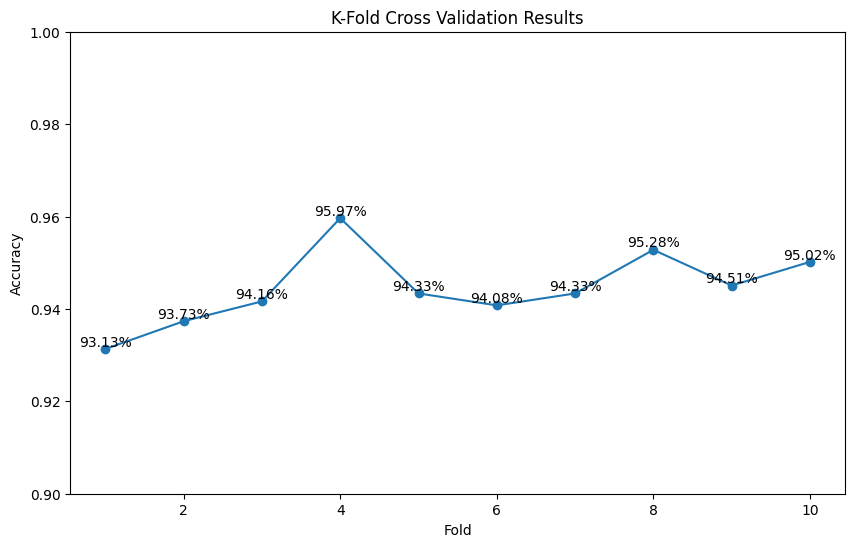

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = rfc.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
9                   call_to_ptp    0.180478
11                     RPC_rate    0.173022
13                recovery_rate    0.142460
10            total_case_closed    0.138772
12                     PTP_rate    0.086390
8             contact_connected    0.083787
7                 total_contact    0.080289
4               problem_solving    0.052988
2   total_debt_payment_recieved    0.022781
1                    total_debt    0.012172
5             transfer_day_diff    0.009918
0                         month    0.007748
3         communication_quality    0.005056
6               debtor_feedback    0.004140


#### Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       0.96      0.97      0.97       300
      Medium       0.95      0.95      0.95      1765
        High       0.94      0.95      0.95      1430

    accuracy                           0.95      3495
   macro avg       0.95      0.95      0.95      3495
weighted avg       0.95      0.95      0.95      3495



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 290   10    0]
 [  11 1671   83]
 [   0   72 1358]]


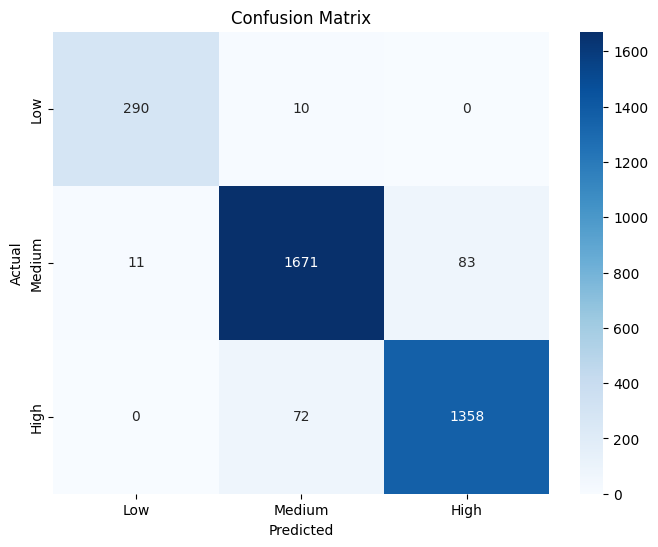

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

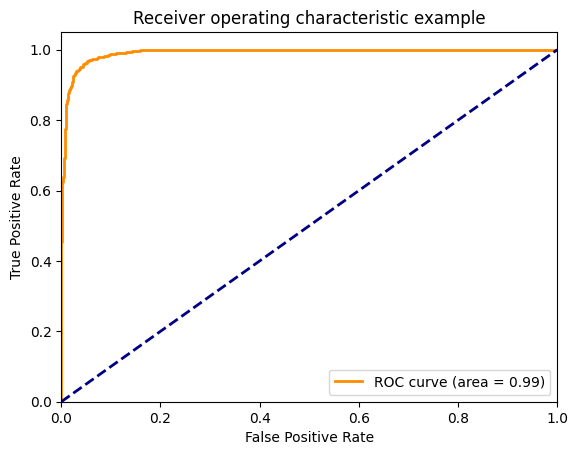

AUC Score (Micro): 0.9945502362868679
AUC Score (Class 0): 0.999489827856025
AUC Score (Class 1): 0.9894519314218343
AUC Score (Class 2): 0.9918688091569448


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_score = rfc.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Micro): {roc_auc['micro']}")
for i in range(n_classes):
    print(f"AUC Score (Class {i}): {roc_auc[i]}")

### Decision Tree Classifier

#### Decision Tree Classifier Threshold = 0.045
* Accuracy = 0.9244635193133047
* Average Accuracy (K-fold) = 0.9319252097989764


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf= 1, max_features=None, max_depth= 9, criterion= 'log_loss')
clf = clf.fit(X_resampled, y_resampled)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9247496423462088

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.91502146 0.92703863 0.93476395 0.93733906 0.93218884 0.93133047
 0.93304721 0.94077253 0.93390558 0.93041237]
Average score:  0.9315820096455909


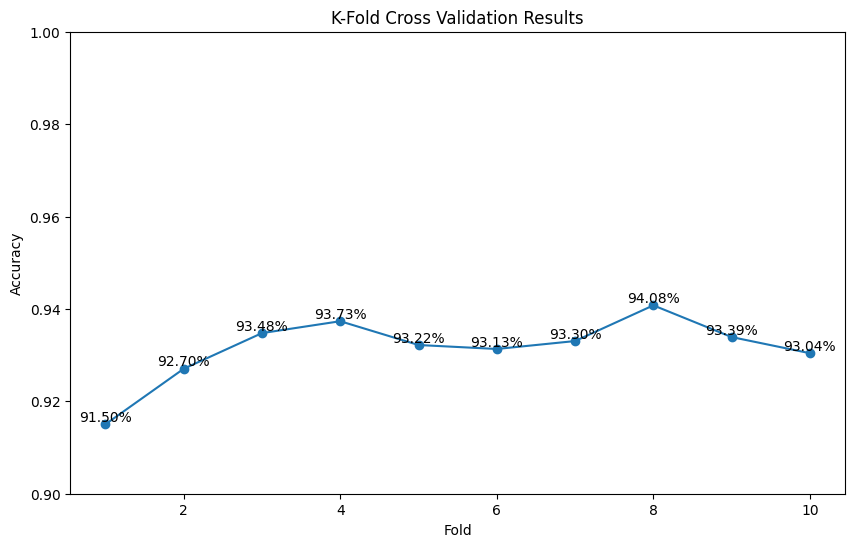

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = clf.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
8             total_case_closed    0.517710
9                      RPC_rate    0.203833
10                     PTP_rate    0.131549
11                recovery_rate    0.120033
5                 total_contact    0.008134
7                   call_to_ptp    0.006566
6             contact_connected    0.003631
3             transfer_day_diff    0.003217
1   total_debt_payment_recieved    0.003112
0                    total_debt    0.001336
4               debtor_feedback    0.000687
2               problem_solving    0.000193


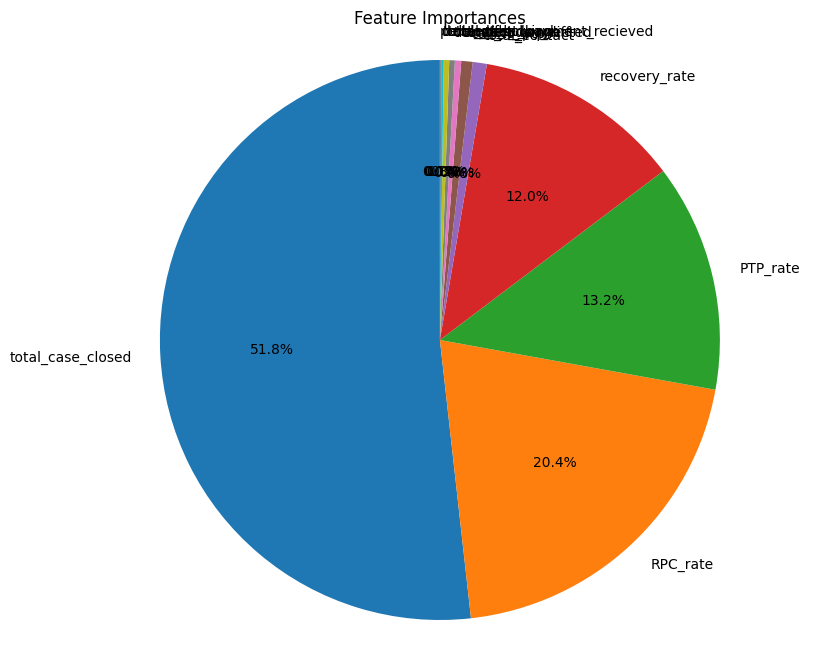

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(feature_importances['importance'], labels=feature_importances['feature'], autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances')
plt.axis('equal')
plt.show()

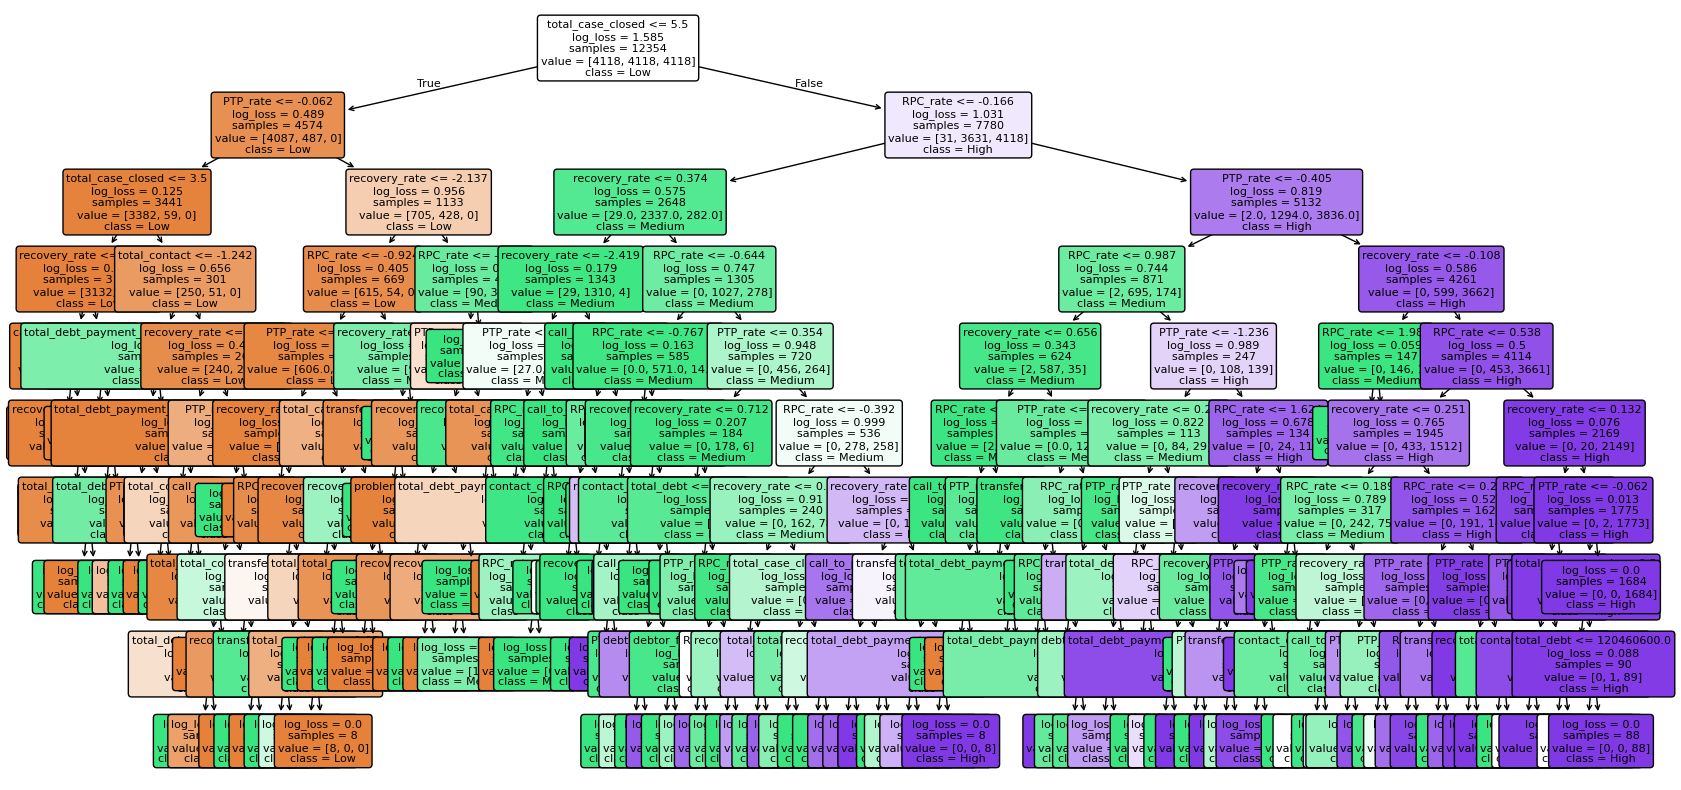

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust figure size as needed for better visibility
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True, fontsize=8) # Adjust fontsize as needed
plt.show()

#### Decision Tree Classifier tanpa Feature Engineering
* Accuracy = 0.8838340486409156
* Average Accuracy (K-fold) = 0.883166305325723


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf= 1, max_features=None, max_depth= 9, criterion= 'log_loss')
clf = clf.fit(X_resampled, y_resampled)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
predictions

array([2, 2, 0, ..., 1, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8838340486409156

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.87467811 0.87296137 0.88583691 0.90214592 0.89098712 0.88669528
 0.87124464 0.8806867  0.87896996 0.88745704]
Average score:  0.883166305325723


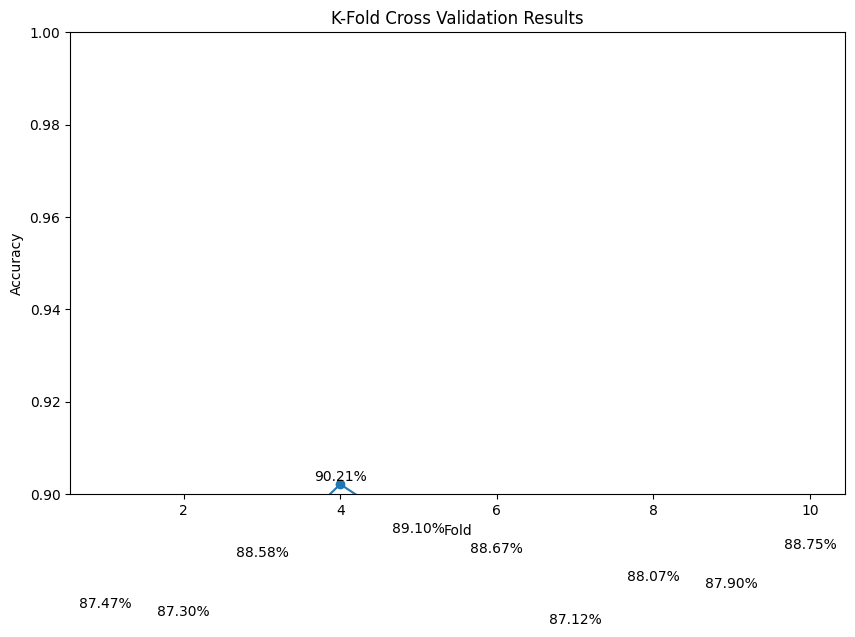

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = clf.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                       feature  importance
8            total_case_closed    0.643165
7                  call_to_ptp    0.138252
5                total_contact    0.138111
1  total_debt_payment_recieved    0.027297
6            contact_connected    0.022333
0                   total_debt    0.014917
2              problem_solving    0.008604
3            transfer_day_diff    0.004639
4              debtor_feedback    0.002682


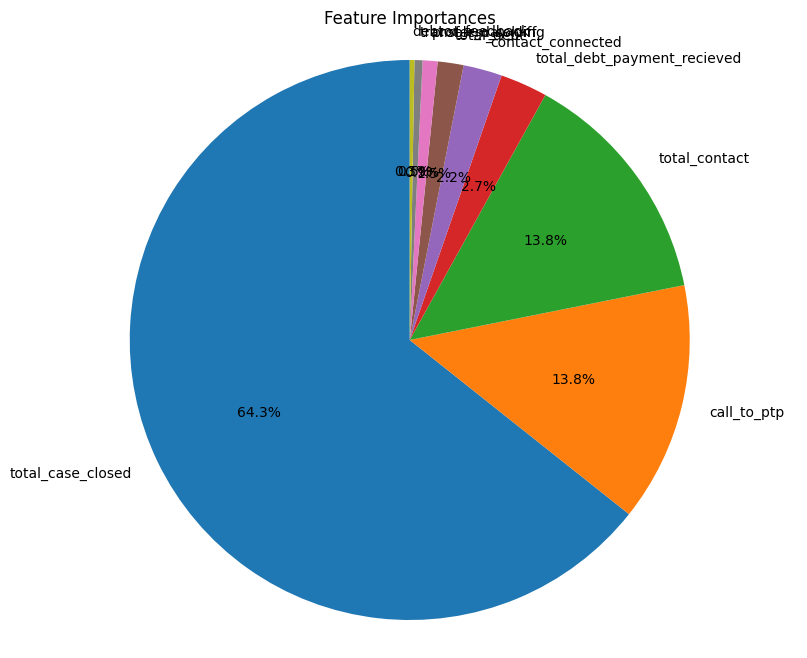

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(feature_importances['importance'], labels=feature_importances['feature'], autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances')
plt.axis('equal')
plt.show()

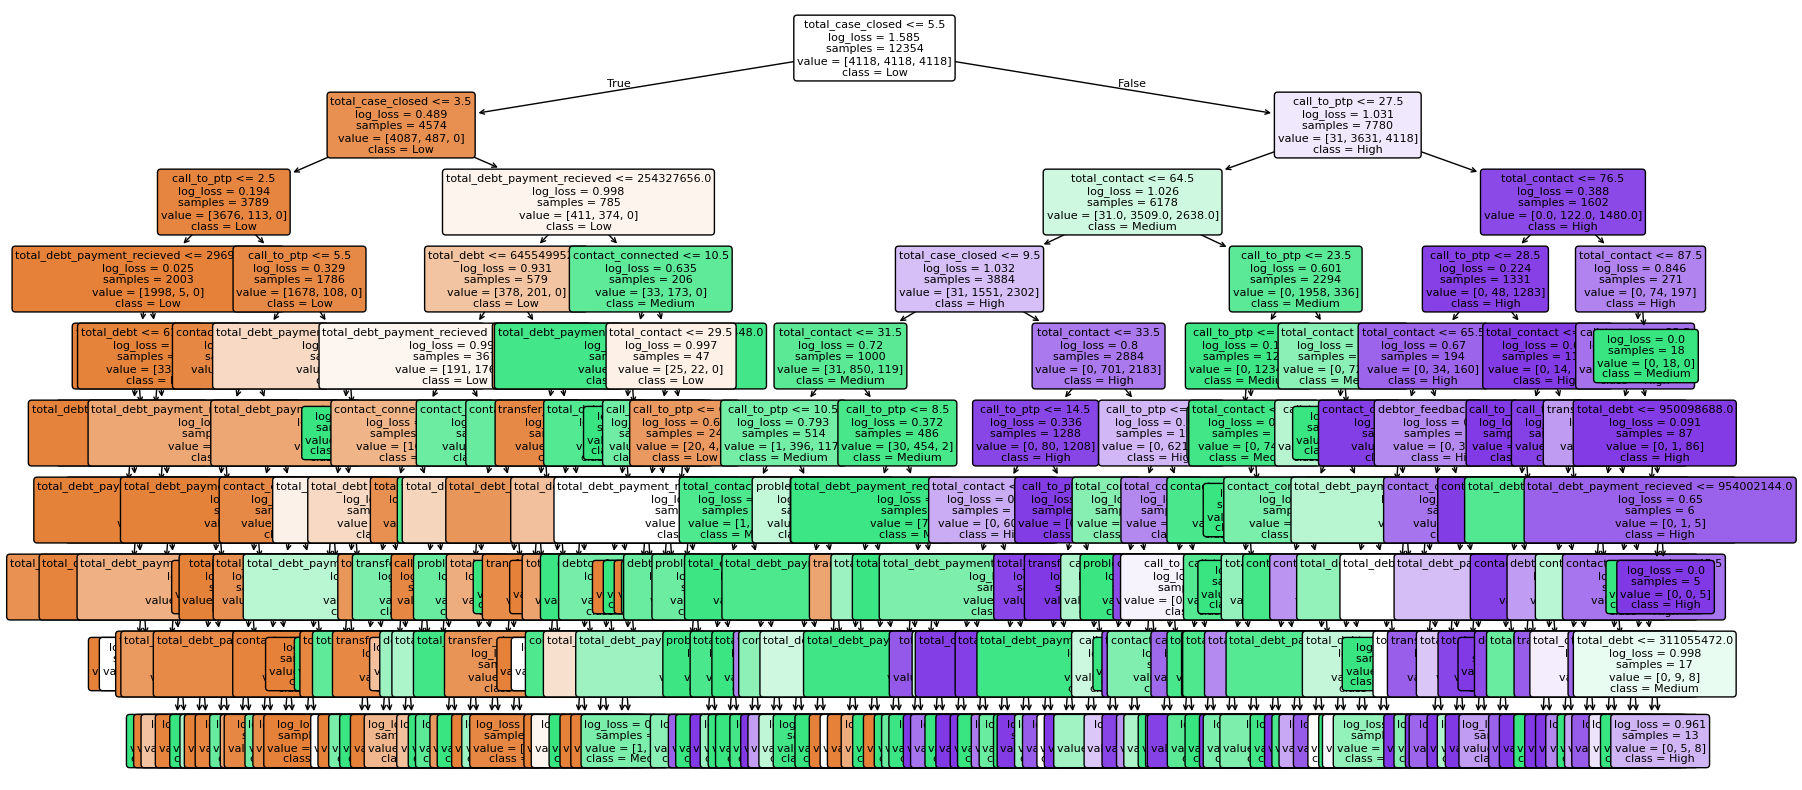

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust figure size as needed for better visibility
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True, fontsize=8) # Adjust fontsize as needed
plt.show()

#### Decision Tree Classifier X Feature Engineering X SMOTE X XGBoost
* Accuracy = 0.9295833333333333
* Average Accuracy (K-fold) = 0.9269999999999999


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf= 1, max_features=None, max_depth= 9, criterion= 'log_loss')
clf = clf.fit(X_resampled, y_resampled)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
predictions

array([2, 2, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.925035765379113

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=kf)

print("Cross-validation scores for each fold: ", scores)
print("Average score: ", scores.mean())

Cross-validation scores for each fold:  [0.91072961 0.92188841 0.93733906 0.93819742 0.93218884 0.92875536
 0.93304721 0.94077253 0.93562232 0.92525773]
Average score:  0.9303798504490951


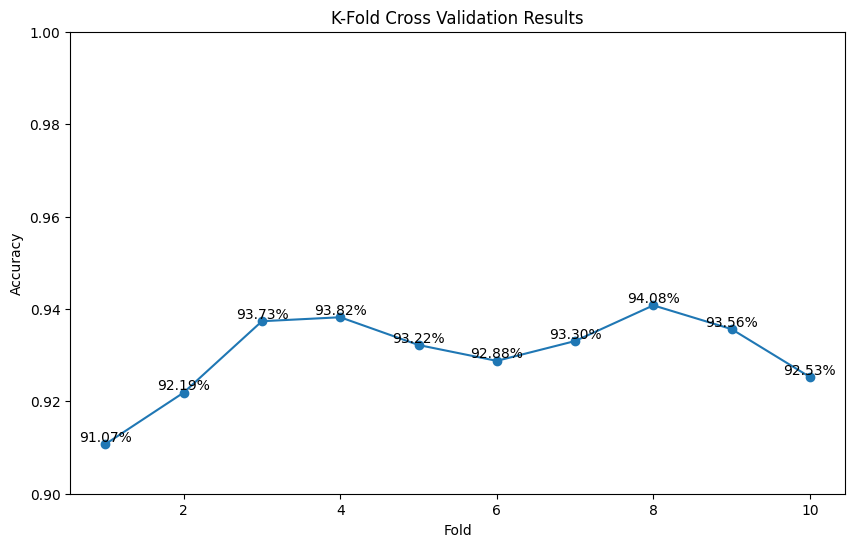

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross Validation Results")
plt.ylim(0.9, 1)

for i, score in enumerate(scores):
    plt.text(i + 1, score, f'{score:.2%}', ha='center', va='bottom')

plt.show()

In [ ]:
feature_names = X.columns
feature_names
importances = clf.feature_importances_

total_importance = sum(importances)

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances / total_importance
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                        feature  importance
10            total_case_closed    0.517493
11                     RPC_rate    0.203589
12                     PTP_rate    0.131760
13                recovery_rate    0.119862
7                 total_contact    0.007438
9                   call_to_ptp    0.006261
8             contact_connected    0.003951
5             transfer_day_diff    0.003480
2   total_debt_payment_recieved    0.003133
1                    total_debt    0.001393
6               debtor_feedback    0.000738
4               problem_solving    0.000448
0                         month    0.000236
3         communication_quality    0.000215


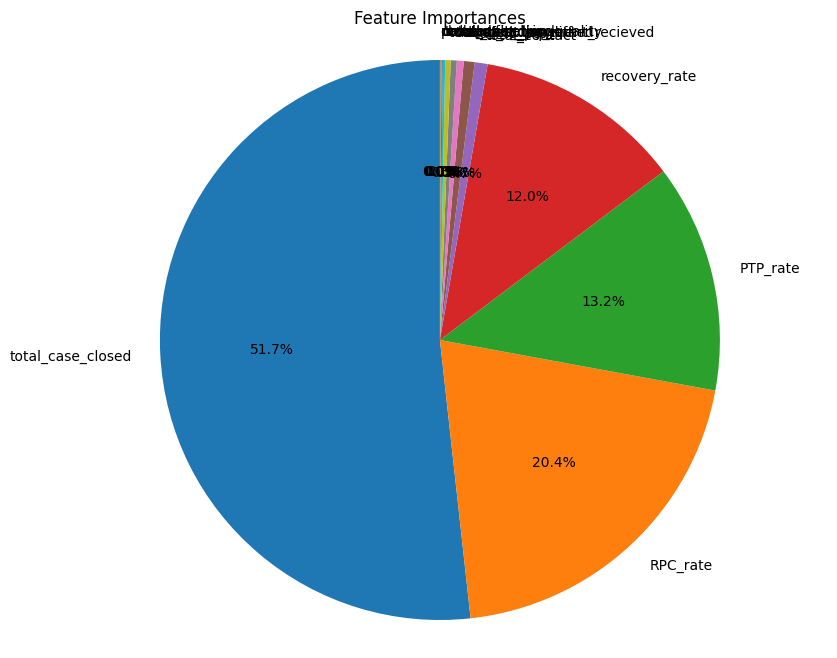

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(feature_importances['importance'], labels=feature_importances['feature'], autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances')
plt.axis('equal')
plt.show()

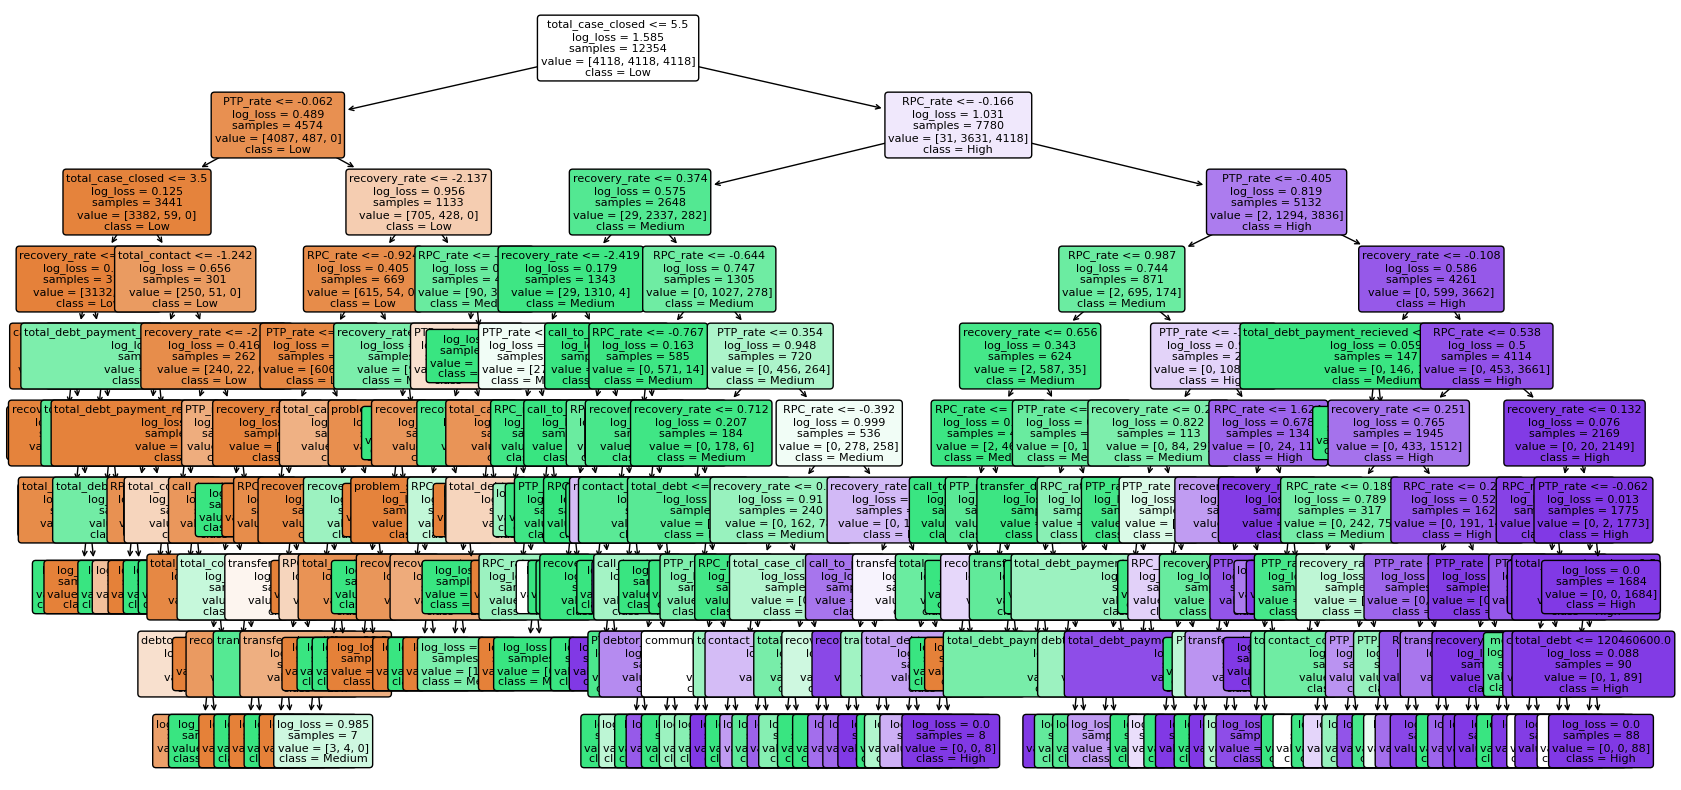

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) # Adjust figure size as needed for better visibility
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True, fontsize=8) # Adjust fontsize as needed
plt.show()

#### Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       0.93      0.93      0.93       300
      Medium       0.94      0.91      0.92      1765
        High       0.90      0.95      0.92      1430

    accuracy                           0.92      3495
   macro avg       0.92      0.93      0.93      3495
weighted avg       0.93      0.92      0.92      3495



In [ ]:
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 279   21    0]
 [  22 1599  144]
 [   0   76 1354]]


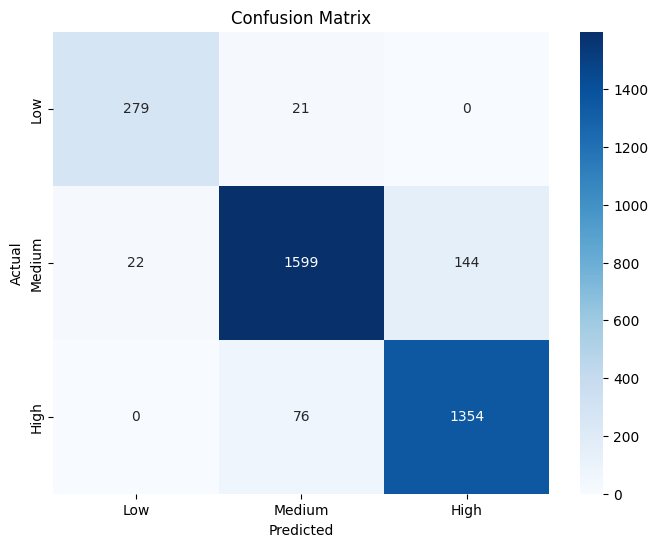

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

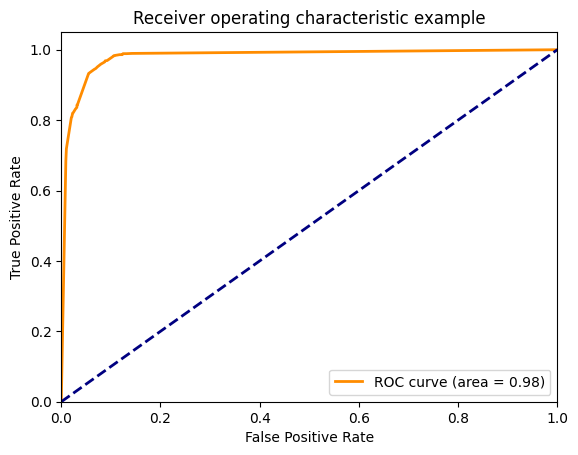

AUC Score (Micro): 0.9786011080615882
AUC Score (Class 0): 0.96990871152843
AUC Score (Class 1): 0.966738115901685
AUC Score (Class 2): 0.9794996528894835


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score (Micro): {roc_auc['micro']}")
for i in range(n_classes):
    print(f"AUC Score (Class {i}): {roc_auc[i]}")

### Perbandingan ROC 3 Model

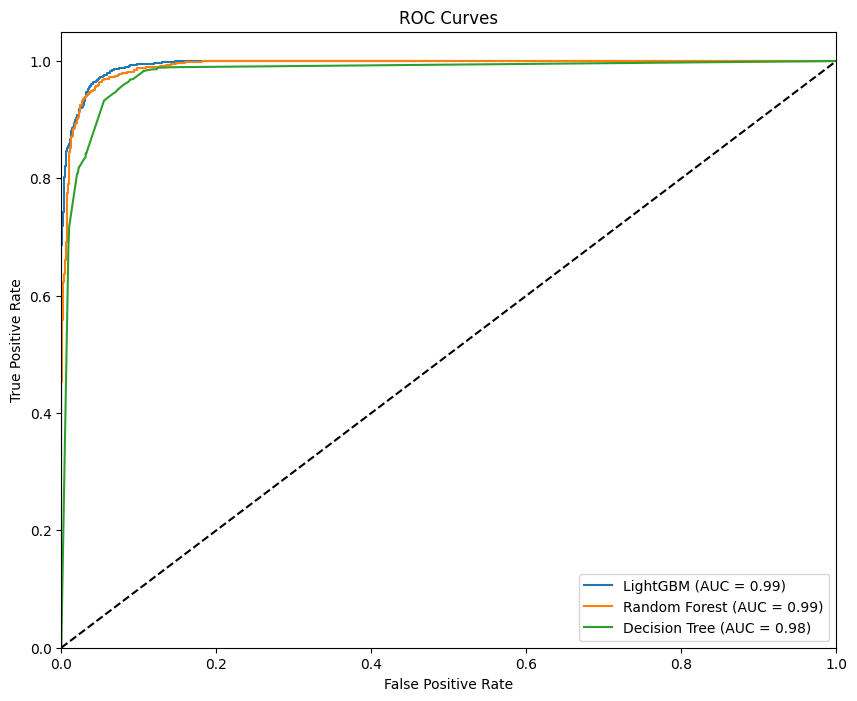

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(y_test, y_probs, model_names):

    n_classes = y_test.shape[1] if len(y_test.shape) > 1 else 3

    plt.figure(figsize=(10, 8))
    for i, (y_prob, model_name) in enumerate(zip(y_probs, model_names)):

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_prob[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        plt.plot(fpr[2], tpr[2], label=f'{model_name} (AUC = {roc_auc[2]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])


y_probs = [
    lgbm_model.predict_proba(X_test),
    rfc.predict_proba(X_test),
    clf.predict_proba(X_test)
]

model_names = ['LightGBM', 'Random Forest', 'Decision Tree']


plot_roc_curves(y_test_bin, y_probs, model_names)